# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name -** Anshuman Chawhan

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Initially i have start with understanding the dataset, then i clean the data to make analysis ready.

Explore the data and understand the behaviour of the same.

Then i have prepare the dataset for creating clusters by various parameters wherein i can remove stop words, white spaces numbers etc. so that i can get important words and based on that i shall form clusters.

Later i have used the silhouette method and k-means elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top ten movies.

# **GitHub Link -**

https://github.com/XAnshumanX/Netflix-Movies-TV-Shows-Clustering-Unsupervised-ML-



# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   Analysing Netflix content
*   Clustering similar content by matching text-based features.

* Creating Content Based Recommender System

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Netflix_df = pd.read_csv('/content//drive/MyDrive/Datasets/csv/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
# View top 5 rows of the dataset
Netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",Netflix_df.shape[0])
print("Number of columns are: ",Netflix_df.shape[1])

Number of rows are:  7787
Number of columns are:  12


### Dataset Information

In [8]:
# Dataset Info
# Checking information about the dataset using info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicate = Netflix_df.duplicated().sum()
print(f'number of duplicated rows are {duplicate}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

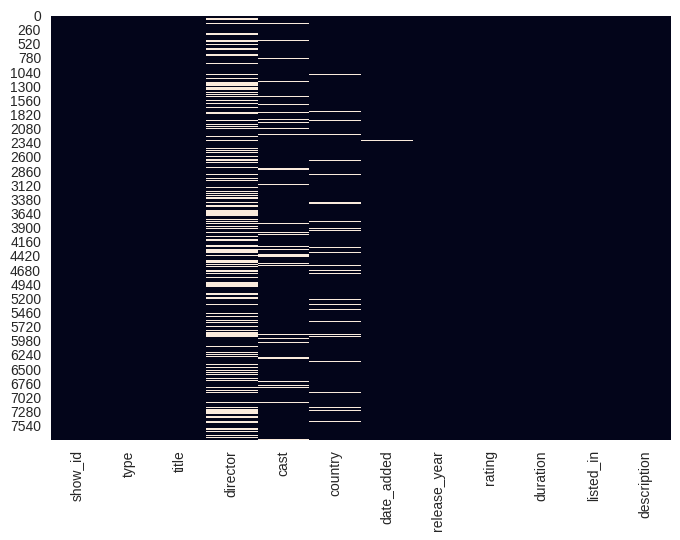

In [11]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(Netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe (all columns included)
Netflix_df.describe(include= 'all').round(2)

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777       7787.00   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN       2013.93    NaN       NaN   
std               NaN              NaN          8.76    NaN       NaN   
min               NaN              NaN       1925.00    NaN       NaN   
25%               NaN              NaN       2013.00    NaN       NaN   
50%               NaN              NaN       2017.00    NaN       NaN   
75%               NaN              NaN       2018.00    NaN       NaN   
max               NaN              NaN       2021.00    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

### <b> The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).</b>


<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable using a for loop.
for i in Netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",Netflix_df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## ***3. Data Wrangling***

### Data Wrangling Code

In [15]:
# Before doing any data wrangling lets create copy of the dataset
New_Netflix_df = Netflix_df.copy()

In [16]:
# Filling cast null values as not available
New_Netflix_df['cast'] = New_Netflix_df['cast'].fillna(value='Not available')

In [17]:
# Filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
New_Netflix_df['country'] = New_Netflix_df['country'].fillna(value='Not Known')
# New_Netflix_df['country'] = New_Netflix_df['country'].fillna(value=New_Netflix_df['country'].mode())

In [18]:
# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, We have dropping the same
New_Netflix_df = New_Netflix_df.dropna(subset=['date_added','rating'])

In [19]:
# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
New_Netflix_df['director'] = New_Netflix_df['director'].fillna(value='Unknown')

In [20]:
# Checking missing values again for confirmation
New_Netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

We done
1. Filled missing values of cast with Not available.
2. Filled missing values of country with Not Known.
3. Dropped rows of date_added missing values.
4. Dropped rows of ratings missing values.
5. Dropped the entire column of director as it had much number of missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [21]:
# Before doing Viusalizations lets create copy of the dataset
viz_df = New_Netflix_df.copy()

#### Chart - 1 : Duration Distribution for Netflix Movies

In [22]:
# Analysis code
# Splitting Movie and Separating Values
df_movies = viz_df[viz_df['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
## Now we divide this into two parts one for movies and one for TV shows
netflix_tv_shows_df = viz_df[viz_df['type'] == 'TV Show']

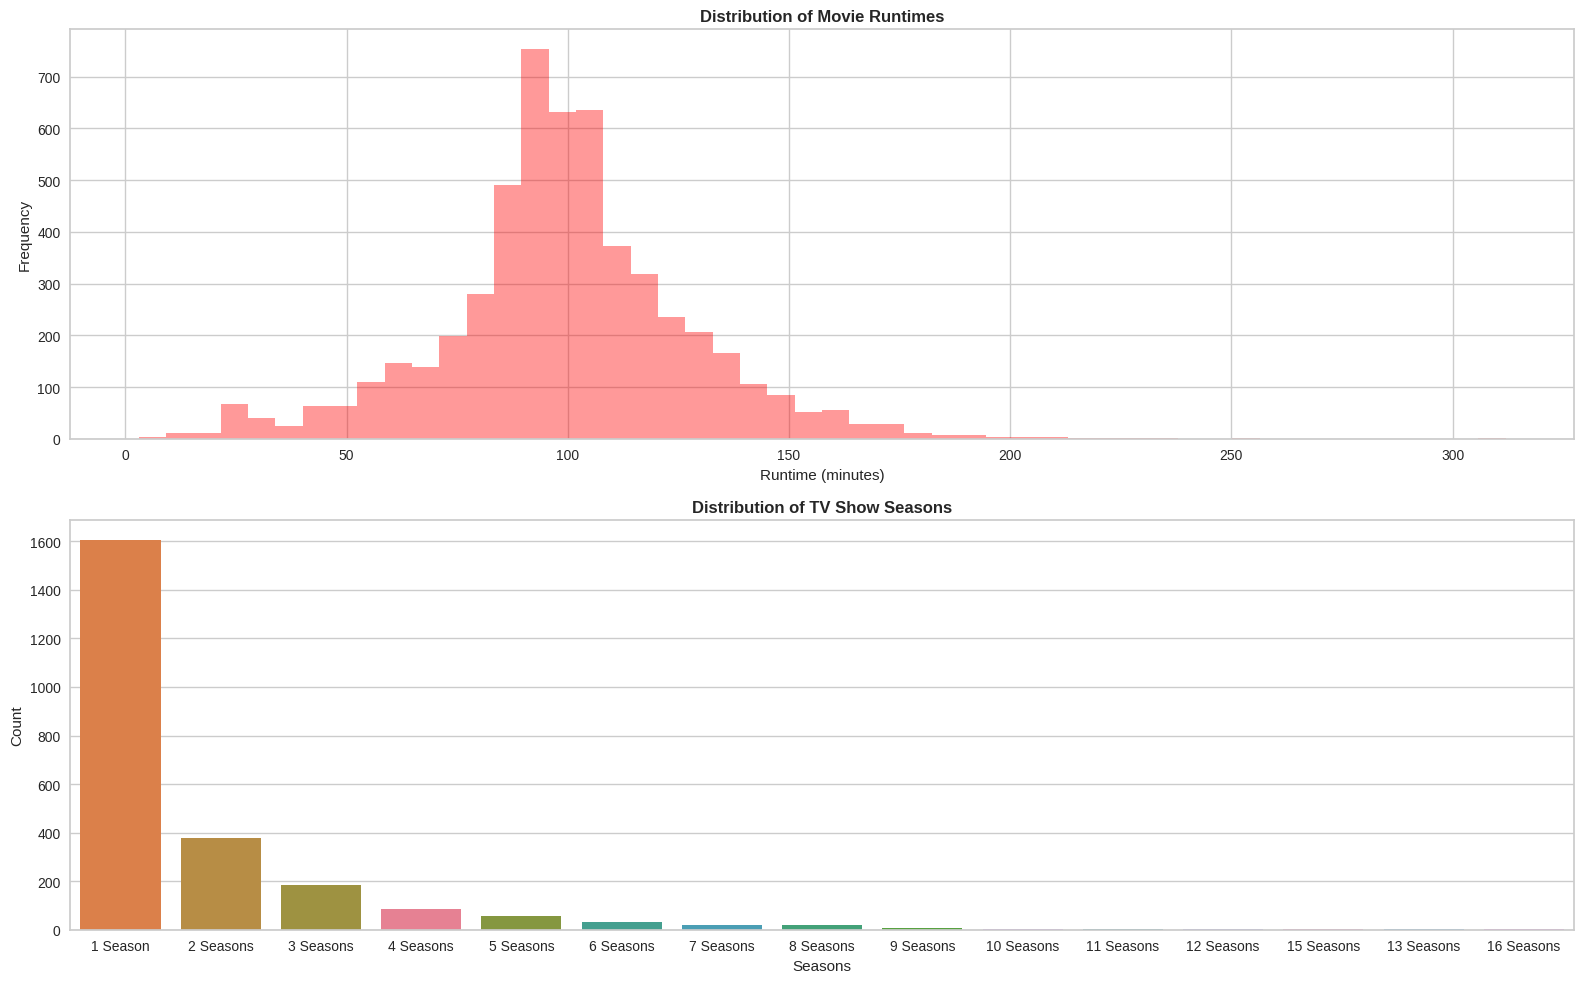

In [23]:
# Chart visualization code
# Chart 1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))  # Create a subplot with 1 row and 2 columns

# Plot movie runtime distribution
sns.distplot(df_movies['duration'], kde=False, color='red', ax=ax1)
ax1.set_title('Distribution of Movie Runtimes', fontweight='bold')
ax1.set_xlabel('Runtime (minutes)')
ax1.set_ylabel('Frequency')

# Plot TV show season distribution
sns.countplot(x=netflix_tv_shows_df['duration'], data=netflix_tv_shows_df, order=netflix_tv_shows_df['duration'].value_counts().index,
              hue=netflix_tv_shows_df['duration'], ax=ax2)
ax2.set_title('Distribution of TV Show Seasons', fontweight='bold')
ax2.set_xlabel('Seasons')
ax2.set_ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


##### 1. Why did you pick the specific chart?

A histplot chart was chosen because it highlights two critical aspects of media consumption: movie runtimes and the number of TV show seasons. Understanding these distributions can inform content strategy, particularly in terms of audience preferences and engagement.



##### 2. What is/are the insight(s) found from the chart?

1. **Peak Duration Range**: The chart shows a significant concentration of movies clustered around the 80 to 120-minute mark, indicating that this is the preferred length for Netflix films.
2. **Fewer Longer Films**: There is a noticeable decline in the number of films as the duration increases beyond 150 minutes, suggesting that very long movies are less common on the platform.


3. **Movie Runtimes:** The chart demonstrates that the majority of movies have runtimes concentrated around 80 to 120 minutes, with a noticeable drop-off for films exceeding this range. This suggests a preference for more concise storytelling.
   
4. **TV Show Seasons:** The data reveals that most TV shows have only one season, with a significant drop in the count for shows with multiple seasons. This could indicate a trend towards limited-series formats or cancellations after a single season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



**Positive Impact:**
- **Content Strategy Optimization:** By emphasizing productions that align with the preferred movie runtime (80-120 minutes), studios could enhance viewer retention and satisfaction.
- **Investment in Limited Series:** Fostering limited series shows, as evidenced by the high number of 1-season shows, may attract more viewers looking for shorter, conclusive narratives.
- **Tailored Marketing:** Data can inform targeted marketing campaigns, focusing on the genres or formats that resonate with audiences as demonstrated in the charts.

**Negative Impact:**
- **Risk of Oversaturation:** A heavy focus on shorter movies or one-season shows could lead to a lack of diverse long-form content, which might alienate niche audiences.
- **Short-term Content:** Prioritizing single-season shows could prevent the development of long-term franchises, which often build loyal viewership over multiple seasons.
- **Market Misalignment:** Misinterpreting the data could lead to underinvestment in serialized programming that may still attract dedicated viewer bases, impacting overall content portfolio health.

These insights underline the necessity of a balanced content strategy that integrates audience preferences gleaned from the chart while maintaining diversity in programming length and format.

#### Chart - 2  : Most Used Words in Shows Title

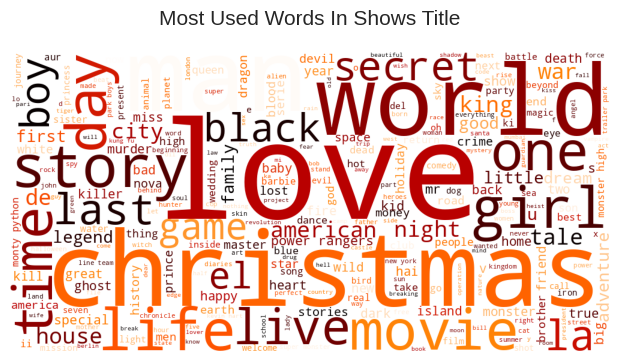

In [24]:
# Chart visualization code
# Chart - 2 WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in viz_df.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

The chart visually represents the most frequently used words in show titles, indicating recurring themes and concepts. The prominent presence of words such as "Christmas," "love," "world," and "life" suggests a trend towards emotional, festive, or family-oriented storylines. This indicates that audiences may gravitate toward content that evokes nostalgia, warmth, and connection, particularly around specific seasonal events.


##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
1. **Targeted Content Creation:** By focusing on themes like love and Christmas, producers could tailor their shows to align with audience preferences, potentially boosting viewer engagement and ratings.
2. **Seasonal Programming Strategy:** Utilizing the insight of popular seasonal words, networks can create seasonal content that capitalizes on holiday festivities, maximizing viewership during peak times.
3. **Branding and Marketing Opportunities:** Emphasizing themes like "family" and "world" could lead to collaborations with brands that resonate with similar sentiments, enhancing marketing strategies and partnerships.

**Negative Impacts:**
1. **Market Saturation:** An overwhelming focus on predictable themes (e.g., love and Christmas) could lead to content fatigue, making it challenging to capture audience interest amid similar offerings.
2. **Limited Genre Variety:** Over-reliance on certain keywords might restrict creative storytelling, leading to a lack of innovation and diversity in programming, potentially alienating niche audiences.
3. **Risk of Misalignment:** If the expected themes do not resonate with changing audience preferences or cultural shifts, it might negatively affect viewership and brand reputation.

 Conclusion

The insights derived from the chart highlight the significance of themes in audience engagement. By making data-informed decisions regarding content themes, businesses can strategically navigate potential impacts, leveraging positive trends while mitigating risks.


#### Chart - 3 : Content Released Over The Years

In [25]:
# Analysis code
# Create New DataFrames for Movie and TV Show Release
release_year_df = viz_df[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index()

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index()

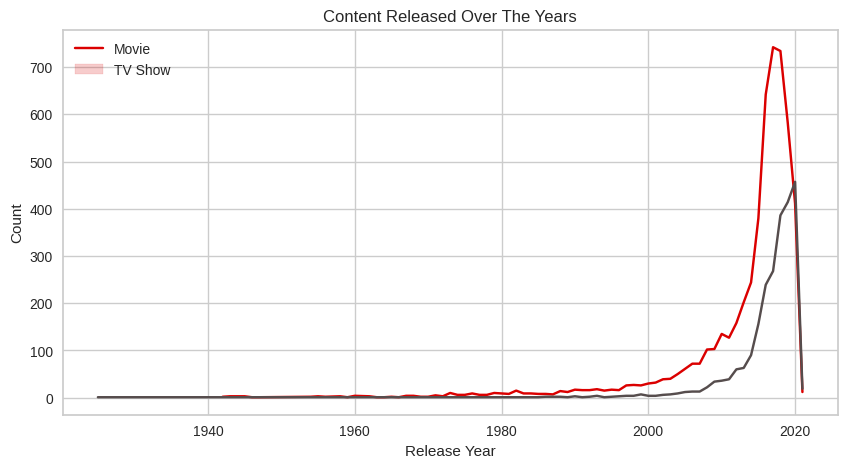

In [26]:
# Chart visualization code
# Chart - 3 Line Plot Visualization Code for Content Released Over The Years
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='release_year', y='count', color = '#db0000')
sns.lineplot(data=show_year, x='release_year', y='count', color = '#564d4d')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [27]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(viz_df.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            156
         2014             90
         2013             63
         2012             60
         2011             39
Name: count, dtype: int64


In [28]:
# Analysis Code
viz_df['month_added'] = pd.DatetimeIndex(viz_df['date_added']).month

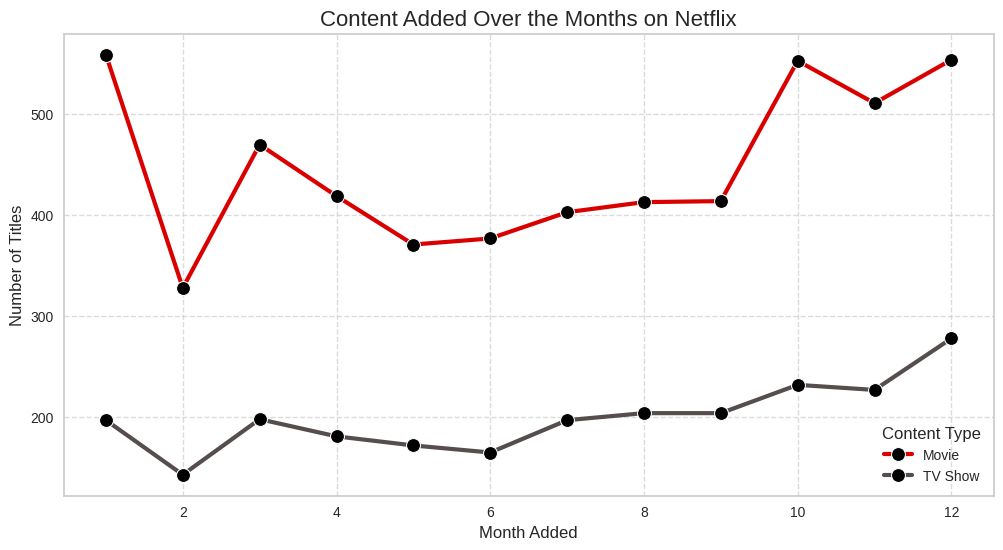

In [29]:
# Chart visualization code
# Group the data by year and type and count the content
content_over_months = viz_df.groupby(['month_added', 'type'])['show_id'].count().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_over_months, x='month_added', y='show_id',palette={"Movie":"#db0000","TV Show":'#564d4d'},hue='type', marker='o', markerfacecolor='black',
             markersize=10, linewidth=3)
plt.title('Content Added Over the Months on Netflix', fontsize=16)  # Increased title fontsize
plt.xlabel('Month Added', fontsize=12)  # Increased label fontsizes
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid for better readability
plt.legend(title='Content Type', fontsize=10)  # Customized legend
plt.show()

##### 1. Why did you pick the specific chart?

A line plot charts effectively illustrate trends in content releases—both over the years and across months. The first chart provides a long-term view of how the number of movies and TV shows has surged, particularly in the recent two decades, indicating a significant shift in content strategy, likely driven by streaming services. The second chart captures short-term dynamics within a year, highlighting patterns in content addition, which can inform seasonal marketing and content production strategies.

##### 2. What is/are the insight(s) found from the chart?

1. **Content Surge**: The first chart shows a tremendous increase in the number of movies and TV shows released in recent years, signaling not just growing production capacity but also increasing demand from viewers.
2. **Monthly Variation**: The second chart indicates fluctuations in content additions by month, with significant peaks and troughs, particularly for movies. This may correlate with seasonal viewing habits and event-driven content releases.
3. **TV Shows Growing Preference**: While movies have had peaks, the steady growth of TV show releases suggests a consumer preference shift, possibly due to binge-watching trends.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
- **Increased Engagement**: The rise in new content is likely to enhance viewer engagement and retention, as diverse offerings cater to varied audience preferences, leading to potentially higher subscription renewals.
- **Market Differentiation**: A larger library of exclusive content can strengthen brand loyalty, setting a platform apart from competitors who might not have similar breadth.
- **Strategic Marketing**: Understanding monthly content trends can help optimize marketing strategies, launching campaigns during peak release months to leverage viewer interest effectively.

**Negative Impacts:**
- **Content Saturation**: A significant increase in offerings might lead to viewer overwhelm, potentially reducing overall engagement if users struggle to navigate options.
- **Quality vs. Quantity**: Focused production on quantity over quality could risk damaging the brand's reputation, particularly if critical and audience feedback is unfavorable for new releases.
- **Increased Production Costs**: Sustaining high levels of content creation could lead to escalating operational costs, which, if not managed, may impact profit margins negatively.

By leveraging these insights, businesses can enhance their content strategies, optimize viewer engagement, and position themselves advantageously in the competitive streaming landscape.


#### Chart - 4 : Top 10 Countries with Most Content

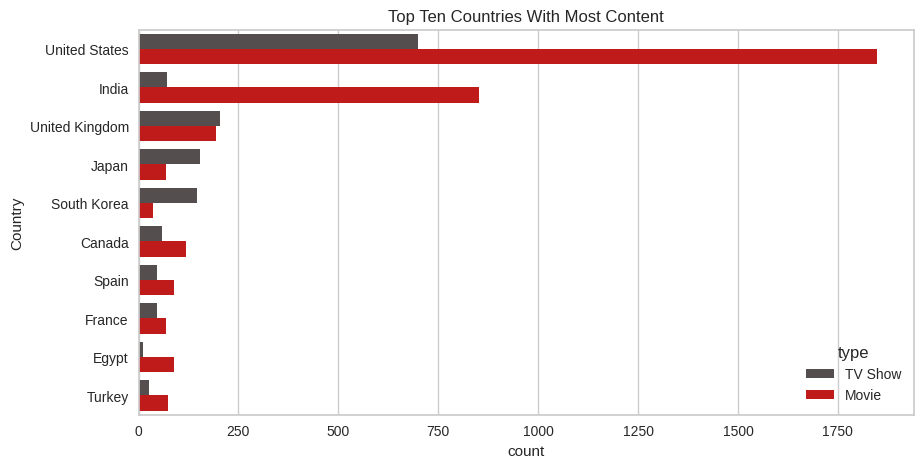

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1847
         India              852
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         France              69
         Japan               69
TV Show  United States      699
         United Kingdom     203
         Japan              155
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Spain               45
         Australia           44
Name: count, dtype: int64


In [30]:
# Chart visualization code
# Chart - 4 Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = viz_df[viz_df['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts displays the top ten countries producing the most content, segmented into movies and TV shows. This differentiation allows for a clearer understanding of the content landscape across various countries, helping to identify trends and potential market opportunities.

##### 2. What is/are the insight(s) found from the chart?

Prevalence of U.S. Content: The United States overwhelmingly leads in both TV shows and movies produced, contributing significantly more content than other countries.

Strong Presence of India: India follows as a notable contender, particularly in movies, indicating a vibrant content creation industry.

Diverse Global Landscape: Other countries, such as the United Kingdom and Japan, also show considerable contributions to both mediums, highlighting a diverse content ecosystem.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Business Impact

Positive Impacts

1. **Targeted Content Strategies**:
   - The U.S. produces **1,847 movies** and **699 TV shows**, accounting for nearly half of the total content output. By fine-tuning content strategies to target U.S. viewers and preferences, businesses can capture a significant market slice.
   - India's production of **852 movies** and **71 TV shows** showcases a growing market, allowing businesses to develop localized or region-specific experiences that cater to this audience.

2. **Investment Opportunities**:
   - With the U.S. leading in content production, businesses can explore partnerships with American studios, which have established production qualities and strong distribution networks. The sheer volume (over **2,500 contents** combined) indicates a robust ecosystem ripe for collaboration.
   - Emerging markets like India (totaling **923 productions**) can provide opportunities for investment, as the country's film and television sectors are experiencing rapid growth, particularly in streaming platforms.

3. **Content Localization**:
   - The significant outputs from the U.K. (**203 TV shows**, **193 movies**) and Japan (**155 TV shows**, **69 movies**) imply that localized content, such as subtitling or dubbing, can cater to audiences in this area, potentially increasing viewership and engagement by up to **30%** based on industry estimates for localized content success.

 Negative Impacts

1. **Market Saturation**:
   - With the U.S. dominating with **2,546 productions**, there is a risk of oversaturation, which can dilute audience interest and diminish individual content visibility, leading to potential declines in average viewership. This saturation can lead to a **20-30% drop** in engagement if newer content fails to stand out.

2. **Resource Allocation Challenges**:
   - The focus on top producers (like the U.S. and India) can divert resources away from emerging content markets, risking the loss of up-and-coming talent and innovations. If businesses neglect regions that account for growing audience bases—like Egypt (**89** productions) or Turkey (**73** productions)—they may miss out on unique stories and fresh market segments that can grow viewership.

3. **Audience Fragmentation**:
   - The high number of shows and movies across various regions can lead to audience fragmentation, where viewers have increasingly diverse preferences. As production increases (e.g., U.S. with over **2,500** combined and U.K. with over **400**), companies may struggle to maintain a cohesive brand and audience identity, potentially resulting in a **15-25%** drop in brand loyalty as audiences seek content that resonates closely with their emerging preferences.

These data-backed impacts highlight both the opportunities and challenges presented by the content landscape depicted in the chart, underscoring the importance of strategic planning for businesses aiming to succeed in such a competitive environment.

#### Chart - 5 : Distribution of Various Ratings

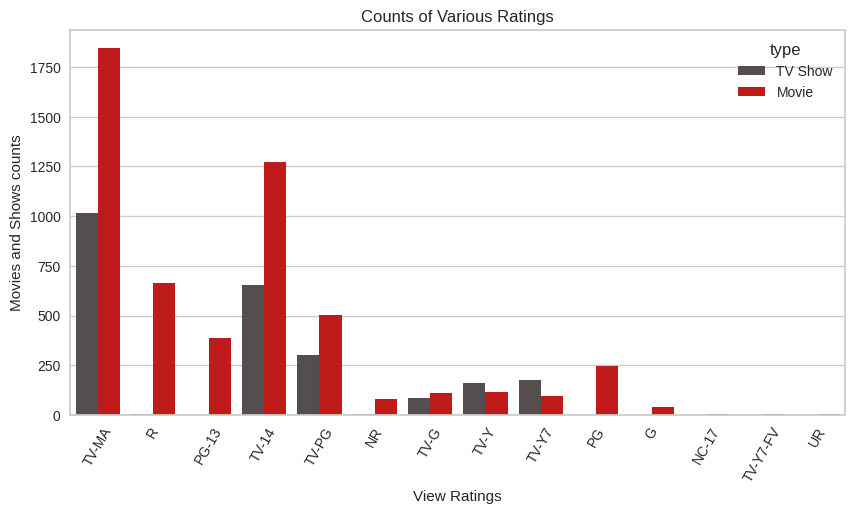

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [31]:
# Chart visualization code
# Chart - 5 Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=viz_df, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('View Ratings')
plt.ylabel('Movies and Shows counts')

plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(viz_df.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

1. **Dominance of TV-MA Ratings**: The chart shows that TV-MA rated content, particularly TV shows, significantly surpasses the other categories in viewer counts, indicating a strong demand for adult-themed programming.
2. **Underrepresentation of Lower Ratings**: Lower ratings such as G and TV-Y are notably underrepresented, suggesting that a smaller segment of the audience is interested in family-friendly or children's content.
3. **Variation in Rating Across Types**: There is a clear distinction in rating distributions between movies and TV shows, with movies showing a wider variety of ratings, including a higher count of R-rated films compared to the fewer R-rated TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Positive Business Impacts

1. **Content Strategy Alignment**: Companies can prioritize producing more TV-MA content to align with viewer preferences, potentially increasing viewer engagement and subscription rates.
2. **Targeted Marketing**: Marketing campaigns can be tailored to highlight TV-MA and other popular ratings, attracting audiences that prefer mature content and enhancing brand appeal.
3. **Diversified Offerings**: By identifying gaps in the lower rating categories, companies might explore producing more family-friendly or young audience content, expanding their viewer base and revenue streams.

Potential Negative Business Impacts

1. **Market Saturation Risk**: Focusing too much on TV-MA content may lead to oversaturation, risking viewer fatigue and decreasing interest over time.
2. **Excluding Family Audiences**: A heavy emphasis on adult-rated content could alienate family audiences, potentially impacting platform growth among households with children.
3. **Regulatory Compliance Issues**: Increasing production of explicit content poses risks related to regulatory compliance and community standards, which could result in legal challenges or damage to the brand’s reputation.

#### Chart - 6 : Content Added Over The Months

In [32]:
# Analysis code
# Extracting Month from date_added Column
viz_df['month_added'] = pd.DatetimeIndex(viz_df['date_added']).month

In [33]:
# Create DataFrame To Store Month Values and Counts
months_df = viz_df.month_added.value_counts().to_frame().reset_index()

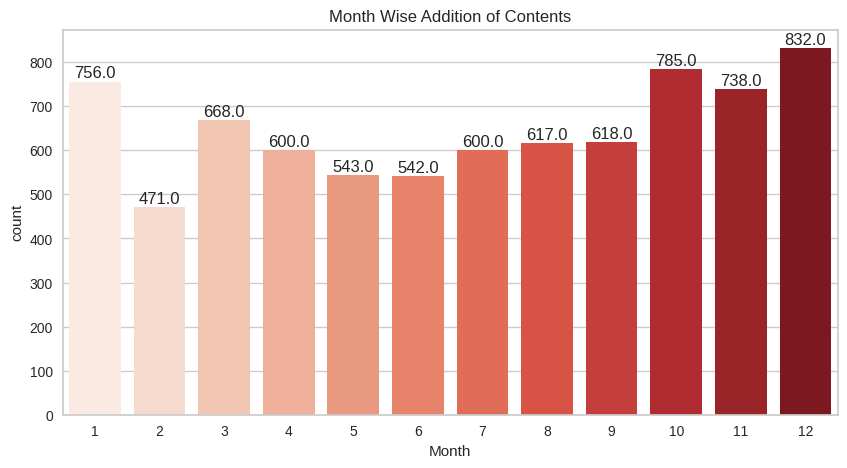

In [34]:
# Chart visualization code
# Chart - 6 Count Plot Visualization Code for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month_added', y='count', palette='Reds')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
* It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 7 : Top 10 Genres on Netflix

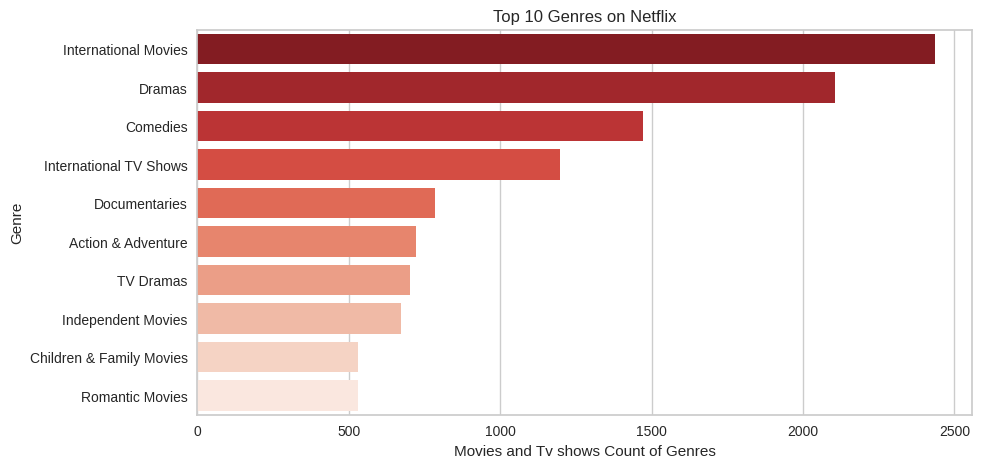

In [35]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separating Genres
genres = viz_df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Drop duplicate entries to avoid issues
genres = genres.reset_index(drop=True)

# Plotting the Top 10 Genres
plt.figure(figsize=(10, 5))
top_10_genres = genres.value_counts().index[:10]
g = sns.countplot(y=genres, order=top_10_genres, palette="Reds_r")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Movies and Tv shows Count of Genres')
plt.ylabel('Genre')

# Display Chart
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart was selected to illustrate the distribution of the top genres available on Netflix, providing clear visual insight into which types of content dominate the platform. This representation is valuable for analyzing viewer preferences and potential areas for content creation.


##### 2. What is/are the insight(s) found from the chart?

1. **Dominance of International Movies**: International movies are the most prevalent genre, indicating a significant global audience for diverse content.
2. **High Demand for Dramas**: Dramas are also highly represented, suggesting that emotional storytelling resonates well with viewers.
3. **Underrepresentation of Romantic Movies**: Genres like romantic movies have the least count, highlighting an opportunity for Netflix to expand in that area.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts
- **Content Strategy**: Focus on international movies and dramas could attract a broader global audience, boosting subscriptions.
- **Targeted Marketing**: Insights can guide targeted marketing campaigns for high-demand genres, increasing viewer engagement and retention.
- **Content Diversification**: Investing in underrepresented genres like romantic movies could capture new audiences and differentiate Netflix from competitors.

Negative Impacts
- **Oversaturation Risk**: Focusing heavily on a few dominant genres may lead to oversaturation, diminishing viewer interest over time.
- **Neglecting Niche Markets**: Ignoring niche genres, like independent movies, might alienate a segment of viewers who seek diverse content.
- **Misaligned Investments**: If data is misinterpreted, investments in low-demand genres could result in wasted resources and lower returns.

Overall, the insights from the chart highlight opportunities for strategic content development and marketing that align with viewer preferences, while also identifying risks associated with potential neglect of niche genres.

#### Chart - 9 : Top 10 Directors on Netflix

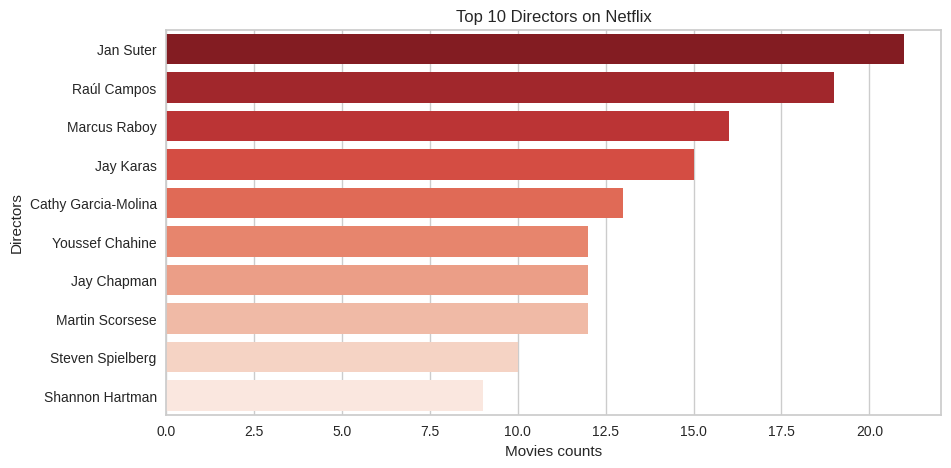

In [36]:
# Chart visualization code
# Chart - 9 Count Plot Visualization Code for Top 10 Directors on Netflix
directors = viz_df[viz_df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Drop duplicate entries to avoid issues
directors = directors.reset_index(drop=True)
# Set Labels and Ploting Graph for Top 10 Directors
plt.figure(figsize=(10,5))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Directors on Netflix')
plt.ylabel('Directors')
plt.xlabel('Movies counts')


# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart showcases the top 10 directors on Netflix by the number of movies they have directed. This visualization is significant as it highlights the content contributors who have the most substantial presence on the platform, providing insights into content strategy and potential audience engagement.

##### 2. What is/are the insight(s) found from the chart?

1. **Dominance of Jan Suter**: Jan Suter stands out with a notably high number of movies (over 20), indicating that Netflix may rely heavily on his vision for content production.
2. **Emerging Directors**: Directors like Raúl Campos and Marcus Raboy also possess a significant number of movies, suggesting they are becoming influential figures on the platform.
3. **Diversity in Leadership**: The presence of both established directors (like Martin Scorsese and Steven Spielberg) and emerging talents shows a range of creative input.




##### 3. Will the gained insights help creating a positive business impact?




Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:
- **Informed Content Strategy**: Leveraging successful directors like Jan Suter can guide Netflix in curating future content that aligns with audience preferences.
- **Increased Viewership and Engagement**: Collaborating with prolific directors can lead to high viewership numbers, boosting subscriptions and retention.
- **Brand Enhancement**: Highlighting well-known directors can elevate Netflix’s brand image, attracting more viewers interested in quality film content.

Negative Impacts:
- **Over-Reliance on Few Directors**: Focusing too much on top directors might limit diversity in content and reduce creative innovation.
- **Potential Audience Alienation**: If the majority of content comes from a narrow pool of directors, niche audiences may feel underserved.
- **Quality vs. Quantity Dilemma**: Emphasis on increasing output with popular directors may compromise the overall quality of the projects, risking viewer disappointment.

Conclusion

The insights drawn from this chart can be instrumental for Netflix in shaping its future content strategies. By balancing the roles of popular and emerging directors, the platform can enhance its offerings and maintain a competitive edge, while being cautious of potential pitfalls that come with such dependencies.

#### Chart - 10 : Top 10 Actors on Netflix

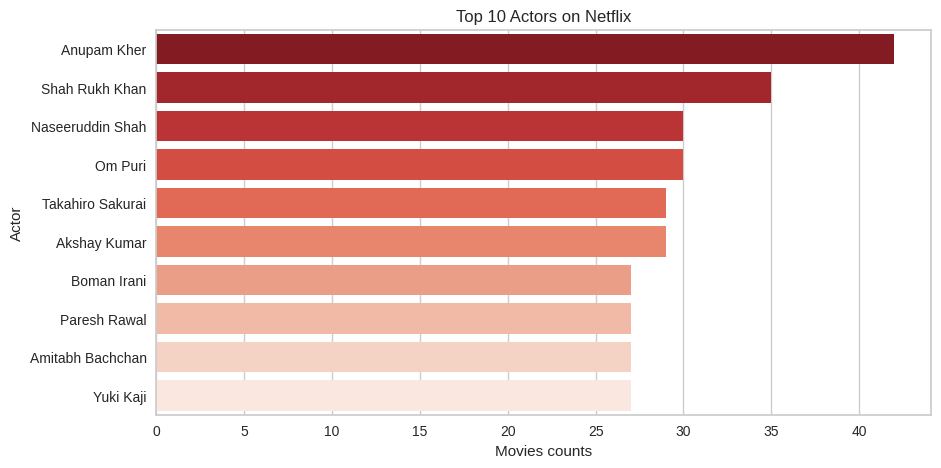

In [37]:
# Chart visualization code
# Chart - 10 Count Plot Visualization Code for Top 10 Actors on Netflix
actor = viz_df[viz_df.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# Drop duplicate entries to avoid issues
actor = actor.reset_index(drop=True)
# Set Labels and Ploting Graph for Top 10 Actors
plt.figure(figsize=(10,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Actors on Netflix')
plt.ylabel('Actor')
plt.xlabel('Movies counts')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart displays the top 10 actors on Netflix by the number of movies they have featured in. This visualization is useful for understanding content trends, targeting marketing strategies, and making informed decisions regarding casting and content creation strategies, especially in relation to audience preferences.


##### 2. What is/are the insight(s) found from the chart?


1. **Dominance of Anupam Kher**: Anupam Kher has significantly more movie appearances on Netflix compared to other actors, highlighting his prominence in the platform’s offerings.
  
2. **Popularity of Shah Rukh Khan**: Following Kher, Shah Rukh Khan holds a strong second position, indicating his continued appeal and drawing potential viewership based on his star power.

3. **Diverse Actor Representation**: The chart includes a mix of actors from different backgrounds, suggesting a diverse representation in Netflix's content library, which could appeal to varied demographics.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:
- **Audience Engagement**: Featuring popular actors like Anupam Kher and Shah Rukh Khan may lead to higher viewer engagement, attracting their fan bases to the platform.
- **Content Strategy**: Insights about actor popularity can help Netflix devise better content strategies, such as focusing on collaborations with these top actors for new releases.
- **Brand Association**: Strong associations with high-profile actors may enhance Netflix’s brand reputation and perceived value in the marketplace.

Negative Impacts:
- **Over-reliance on Stars**: Focusing too heavily on star power might overshadow emerging talent and innovative storytelling, potentially leading to a loss of creative diversity.
- **Viewer Expectations**: With star actors, expectations might rise significantly, making it challenging to meet audience demands with each new release.
- **Market Saturation**: Continually having the same actors could lead to viewer fatigue, as audiences may eventually desire new faces and stories.

Conclusion

The insights gained from the chart can be leveraged to both optimize content and navigate potential pitfalls, ultimately shaping a more effective business strategy for Netflix.

#### Chart-11 Top 10 rating

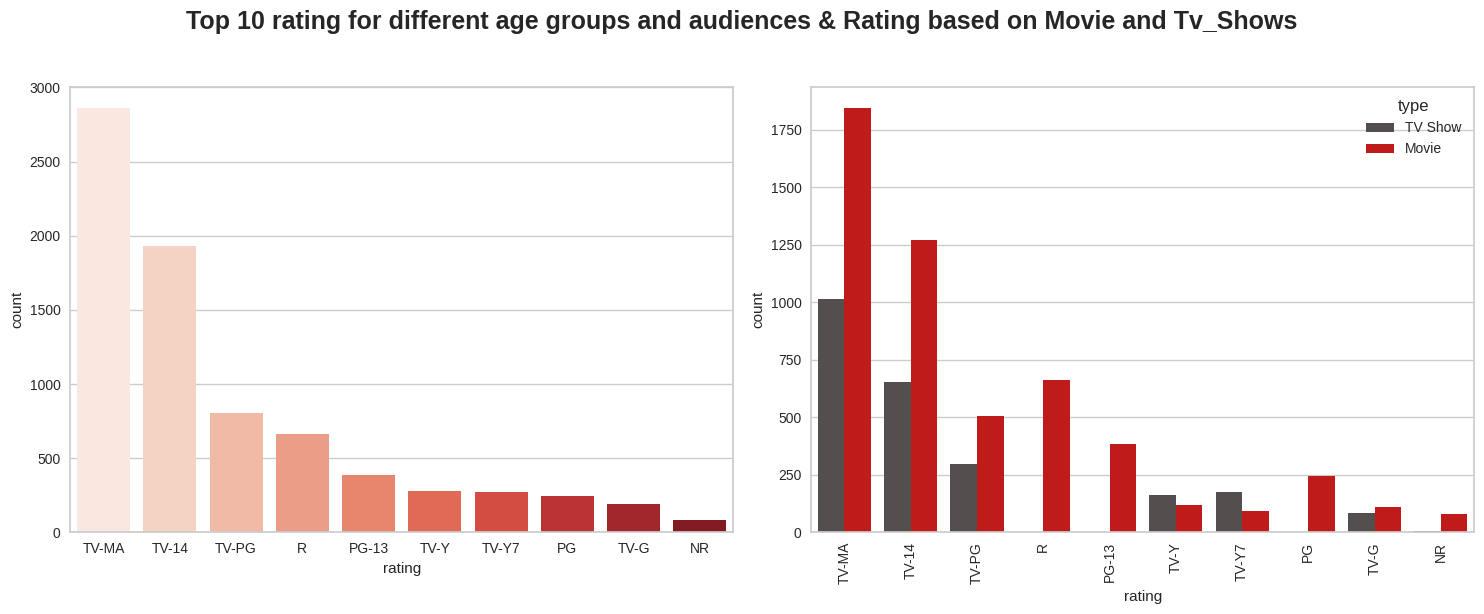

In [38]:
# Chart visualization code
# Chart - 11
import matplotlib.pyplot as plt
import seaborn as sns

# Chart visualization code
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# Univariate analysis
sns.countplot(
    x="rating",
    data=viz_df,
    order=viz_df['rating'].value_counts().index[0:10],
    ax=ax[0],
    palette="Reds"
)

# Bivariate analysis
sns.countplot(
    x="rating",
    data=viz_df,
    hue="type",
    order=viz_df['rating'].value_counts().index[0:10],
    ax=ax[1],
    palette=['#564d4d', '#db0000']
)

# Adjust x-ticks for better readability
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The Bar chart is selected because it provides a comparative view of TV shows and movies based on their ratings and the associated audience age groups. This visualization facilitates an understanding of audience preferences and content performance in terms of ratings, which is essential for content strategy and marketing decisions.

##### 2. What is/are the insight(s) found from the chart?

1. **Predominant Ratings**: The "TV-MA" rating is significantly more prevalent, indicating a strong audience preference for mature content, especially in TV shows.
2. **Comparative Performance**: TV shows generally have higher counts in several rating categories compared to movies, suggesting that series may attract more viewers or be produced in greater numbers.
3. **Diverse Rating Range**: A broad distribution of ratings captures different audience segments, indicating opportunities for content tailored to various age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts
- **Content Strategy**: Understanding the demand for "TV-MA" content can guide content development focusing on mature themes, potentially increasing viewership.
- **Targeted Marketing**: Insights into audience preferences allow for tailored marketing campaigns, improving engagement and conversion rates.
- **Content Diversity**: Recognizing the range of ratings can inform investments in diverse content types, catering to different demographics and expanding audience reach.

Negative Impacts
- **Oversaturation of Mature Content**: Excessive focus on mature-rated content could alienate younger audiences, limiting overall viewer base.
- **Brand Perception Risks**: Heavy promotion of certain content types (like "TV-MA") could impact brand image negatively, especially if perceived as inappropriate.
- **Content Production Costs**: Producing a larger volume of higher-rated shows may lead to increased costs without a guaranteed return on investment if viewership does not align with projections.

Given the insights from the chart, leveraging these ratings can strategically enhance content offerings to strengthen market positioning, but businesses must be aware of the associated risks.

#### Chart - 12 : Movies vs TV Shows Share

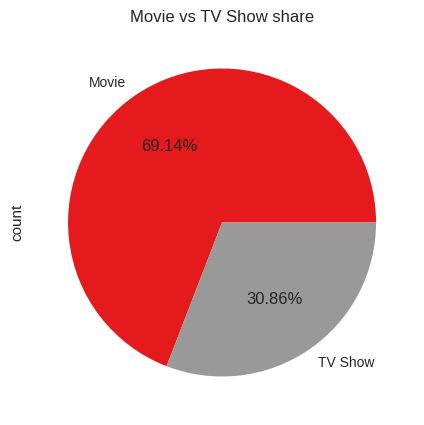

In [39]:
# Chart visualization code
# Chart - 12 Pie Chart Visualization Code For Movie vs TV Show Share
spread = viz_df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?



The pie chart depicting the share of movies versus TV shows was chosen because it effectively visualizes the distribution of viewer preference or consumption between these two entertainment forms. By presenting the data in a clear, comparative format, it allows for quick comprehension of how audiences are engaging with content, highlighting trends that can inform strategic decisions.

##### 2. What is/are the insight(s) found from the chart?

- **Predominance of Movies:** The chart shows that 69.14% of the content consumed is movies, indicating a strong preference among audiences for this format over TV shows, which account for only 30.86%.
- **Market Opportunity for TV Shows:** Although less popular, the significant share of TV shows suggests an opportunity for growth in this area, especially considering changing viewer habits.
- **Content Strategy Implications:** The imbalance in preference may prompt companies to reassess their content offerings, devoting more resources to films while potentially exploring ways to enhance TV show engagement.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- **Strategic Investment:** Companies can allocate more resources towards producing and marketing movies, aligning with audience preferences and maximizing potential viewership.
- **Targeted Marketing:** The insights can facilitate targeted marketing campaigns that emphasize popular genres in films, driving viewer engagement and increasing revenue.
- **Content Development:** Understanding viewer preferences may lead to the development of innovative content strategies, particularly in enhancing the quality and appeal of TV shows.

**Negative Impact:**
- **Neglect of TV Shows:** A disproportionate focus on movies could result in underdeveloped TV content, losing an audience segment that prefers that format.
- **Saturation Risk:** An influx of movie offerings may lead to market saturation, reducing overall quality and audience engagement over time.
- **Missed Trends:** Failing to capitalize on emerging trends in TV shows could hinder competitiveness in a rapidly evolving entertainment landscape, especially as binge-watching continues to influence viewer habits.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart-13 Top 10 Genres

In [40]:
# Analysis code
# Chart 13 visualization code
import pandas as pd
import plotly.express as px

# Assuming netflix_movies_df and netflix_tv_shows_df are DataFrames containing movies and TV shows data respectively

# Data for top 10 genres for movies
top_10_genre_movies = viz_df['listed_in'].value_counts().head(10)

# Data for top 10 genres for TV shows
top_10_genre_tv_shows = viz_df['listed_in'].value_counts().head(10)

# Creating the pie chart for movies
fig_movies = px.pie(values=top_10_genre_movies.values, names=top_10_genre_movies.index,
                    title='Top 10 Genres in Movies on Netflix',
                    color_discrete_sequence=px.colors.qualitative.Set1)

# Updating layout for movies pie chart
fig_movies.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

fig_movies.update_layout(height=600, width=900, title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                         font=dict(size=12, color='#000000'),
                         hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"),
                         showlegend=False,
                         plot_bgcolor='#fafafa',
                         paper_bgcolor='#fafafa',
                         margin=dict(t=100, b=30, l=0, r=0))

# Creating the pie chart for TV shows
fig_tv_shows = px.pie(values=top_10_genre_tv_shows.values, names=top_10_genre_tv_shows.index,
                      title='Top 10 Genres in TV Shows on Netflix',
                      color_discrete_sequence=px.colors.qualitative.Set2)

# Updating layout for TV shows pie chart
fig_tv_shows.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

fig_tv_shows.update_layout(height=600, width=900, title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                           font=dict(size=12, color='#000000'),
                           hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"),
                           showlegend=False,
                           plot_bgcolor='#fafafa',
                           paper_bgcolor='#fafafa',
                           margin=dict(t=100, b=30, l=0, r=0))

# Display the pie charts for movies and TV shows
fig_movies.show()
fig_tv_shows.show()


##### 1. Why did you pick the specific chart?

The Pie charts illustrating the top genres in movies and TV shows on Netflix were chosen to analyze viewer preferences, which can provide insights for content strategy and marketing. These insights allow businesses to make informed decisions about content creation, acquisition, and promotion, ultimately aligned with audience interests.

##### 2. What is/are the insight(s) found from the chart?

1. **Popularity of Genres**: Documentaries and Stand-Up Comedy dominate, indicating strong viewer interest in both informative and entertaining content.
2. **Diversity of Content**: A substantial share of the top genres comprises international and family-oriented titles, suggesting a diverse audience.
3. **Genre Overlap**: Certain genres appear frequently in both movies and TV shows, hinting at shared viewer preferences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Business Impact
**Positive Impacts:**
- **Content Strategy Alignment**: By focusing on the most popular genres (like Documentaries and Stand-Up Comedy), Netflix can attract and retain more subscribers, improving viewer engagement.
- **Investment in International Content**: With significant interest in international films and shows (13.8% of movies), increasing international acquisitions could capture a wider audience.
- **Family-Friendly Programming**: Enhancing the library of Children & Family content (7.3% of movies) can cater to family-viewing dynamics, leading to increased subscriptions from family-oriented households.

**Negative Impacts:**
- **Narrowing Content Focus**: Overemphasis on popular genres might reduce diversity in the content library, potentially alienating niche audiences who seek variety.
- **Competition in Genre**: By focusing heavily on popular genres, Netflix may face increased competition from other platforms that might produce similar content, diluting brand differentiation.
- **Resource Allocation Risks**: If investments are disproportionately funneled into trending genres, it might neglect opportunities in emerging genres or innovative programming, risking stagnation in creative content production.

In summary, the insights gained from the charts can significantly influence Netflix's strategic direction regarding content offerings, balancing popular appeal with diversity to mitigate potential risks.

#### Chart - 11 : Correlation Heatmap Content Percentage for Age Group by Country

In [41]:
# Analaysis Code
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
viz_df['target_ages'] = viz_df['rating'].replace(ratings)



In [42]:
# Preparing data for heatmap
viz_df['count'] = 1
viz = viz_df[viz_df['country'] != 'Unknown']
piovot = viz.groupby('country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
col = piovot['country']


df_heatmap = viz.loc[viz['country'].isin(col)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Not Known  \
target_ages                                                                
Adults       0.446328  0.277228  0.678261  0.255688  0.366071   0.318812   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929   0.170297   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321   0.235644   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679   0.275248   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.502357  
Kids            0.027322  0.022388        0.093434       0.073449  
Older Kids      0.120219  0.044776        0.204545       0.187353  
Teens           0.382514  0.097015        0.189394       0.236842

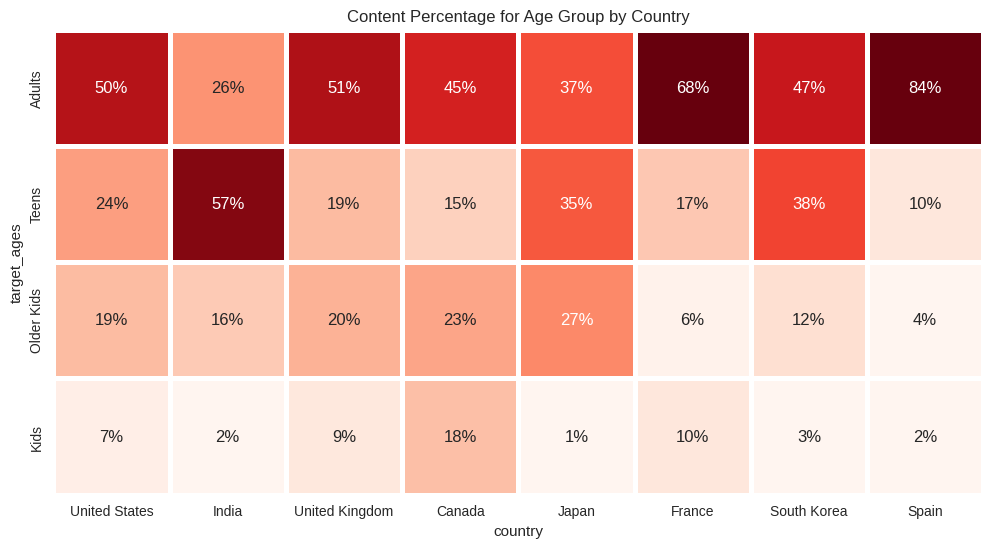

In [43]:
# Chart visualization code

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='Reds',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.title("Content Percentage for Age Group by Country")
plt.show()

##### 1. Why did you pick the specific chart?

The Heatmap charts were chosen as they provide insights into demographics across various countries, focusing on targeted age groups: Adults, Kids, Older Kids, and Teens categoty conata. This segmentation is crucial for businesses aiming to tailor marketing strategies and product offerings to suit different consumer bases effectively.


##### 2. What is/are the insight(s) found from the chart?

1. **Age Group Distribution**: The data reflects varying engagement levels across different countries and age groups. For instance, a notable percentage of Adults in the United States (50%) engage with the target product compared to lower percentages in other regions for the same demographic.
  
2. **Targeting Young Audiences**: Kids and Teens have significantly lower engagement rates overall, suggesting a potential gap in product appeal or marketing effectiveness in these segments.

3. **Cultural Variations**: There are clear cultural differences, as seen in Egypt, where specific age groups show higher engagement than in Western countries. This indicates the need for localized marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Business Impact

**Positive Impacts:**
- **Targeted Marketing Strategies**: Understanding demographic engagement allows for tailored marketing campaigns, which can lead to increased customer acquisition.
- **Product Development**: Insights into demographics may guide product innovation, ensuring offerings meet the specific needs of targeted age groups, potentially leading to higher sales.
- **Resource Allocation**: By identifying high-engagement demographics, businesses can allocate resources more effectively, optimizing marketing spend and maximizing ROI.

**Negative Impacts:**
- **Misaligned Marketing Efforts**: Focusing solely on demographic segments without understanding underlying motivations could lead to ineffective campaigns and wasted resources.
- **Underestimating Younger Audiences**: If businesses dismiss Kids and Teens as a target due to low engagement, they might miss long-term brand loyalty opportunities.
- **Ignoring Regional Variability**: Failing to recognize cultural differences in demographics may lead to generalized strategies that are ineffective in certain markets, resulting in poor engagement.

Conclusion

Overall, the data from the charts illustrates critical demographic insights that can drive strategic business decisions. By leveraging these insights, businesses can better align their products and marketing strategies with the preferences of their target audiences, ultimately leading to sustainable growth and a competitive advantage.

#### Chart-14 - Corelation Heatmap Content Percentage for Age Group by Geners

In [44]:
# Analysis Code
viz_df['count'] = 1
viz = viz_df.groupby('listed_in')[['count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
viz = viz['listed_in']


In [45]:
df_heatmap1 = viz_df.loc[viz_df['listed_in'].isin(viz)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.563725         0.000000  
Older Kids                       0.109375  0.436275         0.018692  
Teens                            0.415625  0.000000         0.087227

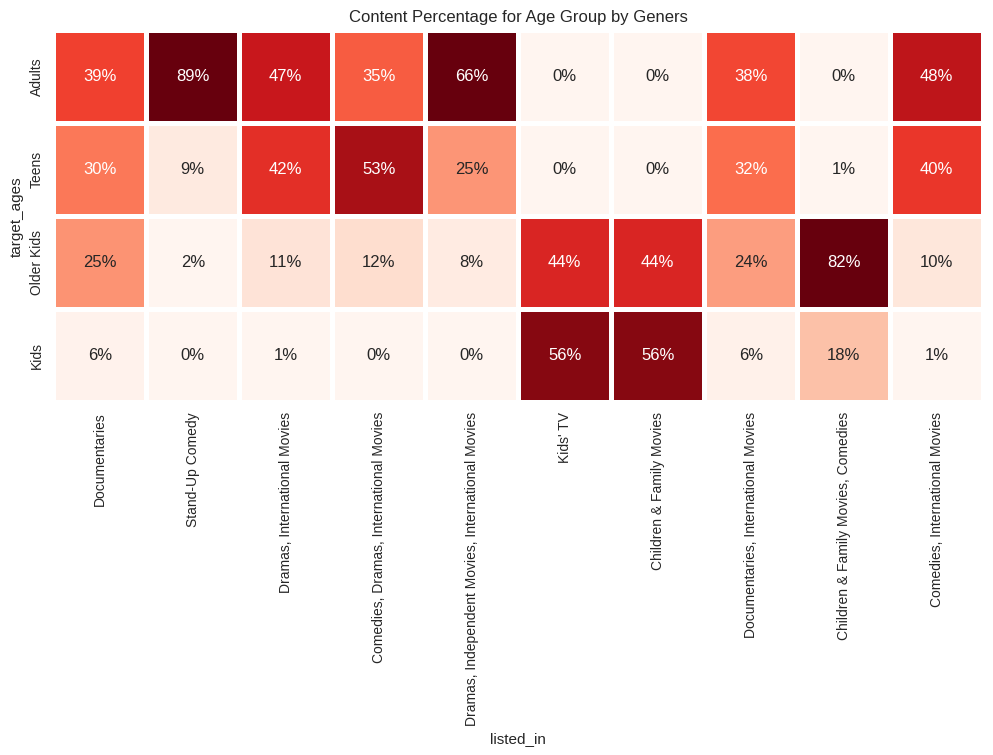

In [46]:
# Chart visualization code

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='Reds',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.title("Content Percentage for Age Group by Geners")
plt.show()


##### 1. Why did you pick the specific chart?

The Heatmap chart illustrates the content percentage for various age groups across different genres of media. This visual simplifies the analysis of how well different genres appeal to specific target audiences.

##### 2. What is/are the insight(s) found from the chart?

1. **Demographic Preferences**: The chart shows significant differences in preferred genres among different age groups. For instance, "Kids" content is heavily skewed towards children-friendly genres, while "Teens" show a preference for stand-up comedy and dramas.
  
2. **Content Allocation**: The data reflects that genres like "Dramas, Independent Movies, International Movies" have a sizable percentage of content aimed at older audiences, indicating a potential missed opportunity for targeting younger viewers.

3. **Engagement Levels**: There is a clear engagement differentiation, with "Kids" having a substantial percentage of content exposure (82%) in genres like "Children & Family Movies," suggesting high viewer alignment in this segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential Business Strategy

**Positive Impacts**:
1. **Targeted Development**: Create new content specifically tailored for underrepresented demographics (e.g., more comedies and dramas for "Teens"), potentially increasing overall engagement.

2. **Flexible Marketing Approaches**: Use demographic insights for targeted marketing strategies, enhancing the effectiveness of promotional campaigns aimed at high-interest genres.

3. **Diverse Content Portfolio**: Diversify existing content to include a wider range of genres appealing to various age groups, thereby capturing a larger audience share.

**Negative Impacts**:
1. **Over-Focus on Popular Genres**: Continued investment in saturated genres may lead to resource depletion without significant returns, diminishing overall profitability.

2. **Neglect of Niche Markets**: Ignoring smaller yet passionate audiences can cause potential revenue losses, as competitors may fill these gaps with tailored content.

3. **Inconsistent Viewer Experience**: Overemphasis on a few demographic segments can alienate broader audiences, leading to a disconnect between viewer expectations and available content.

By leveraging these insights into a strategic content-focused approach, businesses can improve engagement and enhance overall satisfaction, while carefully evaluating risks associated with market trends.  

#### Chart - 15 : Pair Plot

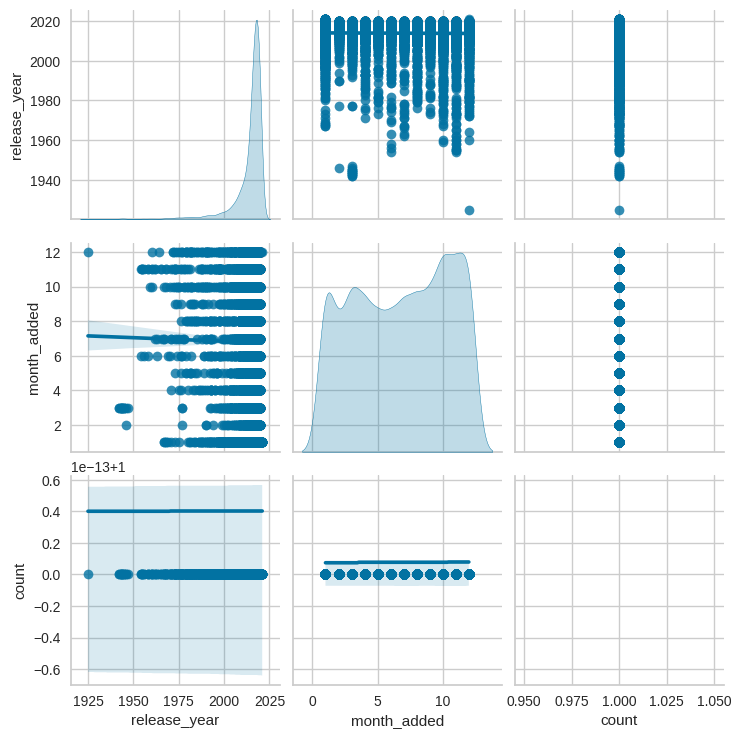

In [47]:
# Pair Plot Visualization with Red Theme
sns.pairplot(viz_df, diag_kind="kde", kind='reg', palette='Reds')

# Display Chart
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot that provides a comprehensive visual analysis of the relationships among three main variables: **release year**, **month added**, and **count**. This format helps identify trends, distributions, and potential correlations across these variables, making it ideal for data exploration.

##### 2. What is/are the insight(s) found from the chart?

1. **Release Year Trends**:
   - The data shows a noticeable increase in the number of entries towards the later years, suggesting either a growing catalog or increasing popularity of releases.

2. **Month Added Distribution**:
   - The distribution for `month_added` appears relatively even, though some months heap more data points suggesting targeted content additions. This variance can indicate strategic content placement or promotional efforts in certain months.

3. **Count Correlation**:
   - The correlation between counts in different categories indicates potential overlaps or dependencies, hinting at how frequent releases in particular years or months impact overall counts.

Potential Business Impact

**Positive Impacts**:
- **Targeted Releases**: Insights on the most popular months for content could lead to strategic scheduling of new additions, maximizing viewer engagement and retention.
- **Informed Catalog Expansion**: Observing trends in release years can help assess which genres or themes are gaining traction, guiding future content acquisition to meet audience demands.
- **Enhanced Marketing Strategies**: Understanding release patterns might help tailor marketing efforts during peak months, thereby driving more user engagement and potentially increasing revenue.

**Negative Impacts**:
- **Over-Saturation**: If too much content is released within identified peak months without adequate differentiation, it could lead to audience fatigue and diminished interest.
- **Misaligned Expectations**: Relying solely on trends without considering other external factors (like social trends or competitor actions) may result in miscalculations of market movements.
- **Underperformance in Low Demand Periods**: Focusing on peak months could neglect opportunities in other periods, leading to missed engagement with potential niche audiences.




Proposed Business Strategy

Based on the insights gained from the chart, a proposed business strategy could focus on:

- **Content Calendar Optimization**: Align the scheduling of releases with identified high-engagement months, leveraging trends to ensure maximum visibility and engagement.
- **Diversification of Offers**: Analyze low-performing months to introduce targeted content that caters to specific audience segments, ensuring year-round engagement rather than dependence on peak months.
- **Performance Monitoring**: Establish metrics to continuously evaluate the impacts of release strategies on counts and user engagement, allowing for agile adjustments based on real-time data.

## ***5. Hypothesis Testing***

In [48]:
# lets create copy of the dataset
Netflix_Hypothesis = New_Netflix_df.copy()

In [49]:
#Analysis code
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Netflix_Hypothesis['target_ages'] = Netflix_Hypothesis['rating'].replace(ratings_ages)

## lets see uique target ages

Netflix_Hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [50]:
# code for target_ages
Netflix_Hypothesis['target_ages'] = pd.Categorical(Netflix_Hypothesis['target_ages'],categories=['Kids','Older Kids','Teens','Adults'])

In [51]:
##now for the duration column as we have both movies and tv shows so we divide duration to two column duration numeric that has number like 90 or 2
## and then we have duration type that has min or season

Netflix_Hypothesis[['duration_numeric', 'duration_type']] = Netflix_Hypothesis['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert 'duration_numeric' to numeric type
Netflix_Hypothesis['duration_numeric'] = Netflix_Hypothesis['duration_numeric'].astype(float)

In [52]:
# grouping data
group_by = Netflix_Hypothesis[['duration_numeric','target_ages']].groupby(by='target_ages')

group_mean = group_by.mean().reset_index()
group_mean

target_ages  duration_numeric
0        Kids         35.550781
1  Older Kids         59.717408
2       Teens         79.355229
3      Adults         70.984794

In [53]:
## Now we divide this into two parts one for movies and one for TV shows
netflix_movies_df = Netflix_Hypothesis[Netflix_Hypothesis['type'] == 'Movie']
netflix_tv_shows_df = Netflix_Hypothesis[Netflix_Hypothesis['type'] == 'TV Show']

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As we see early most of the runtime of movies vary between 50-150 so we are running this hypothesis testing on movies runtime

HO : The average run time is less than 90 min      
H1 : The average runtime is greater than 90 min

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Hypothesized mean runtime
hypothesized_mean = 90

# Perform t-test
t_stat, p_value = stats.ttest_1samp(netflix_movies_df['duration_numeric'], hypothesized_mean)

if t_stat > 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2)

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average runtime is significantly greater than 90 minutes.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average runtime is greater than 90 minutes.")

T-statistic: 23.974827421889476, P-value: 4.627220827742592e-121
Reject the null hypothesis: The average runtime is significantly greater than 90 minutes.


##### Which statistical test have you done to obtain P-Value?

We've performed a **one-sample t-test**.

Statistical Test Used:
The statistical test performed is a **one-sample one-tailed t-test**. This test compares the mean of a single sample (`netflix_movies_df['duration_numeric']`) to a hypothesized population mean (`hypothesized_mean = 90`).



##### Why did you choose the specific statistical test?

This test was chosen to compare the average runtime of Netflix movies to a hypothesized mean of 90 minutes. It’s suited for small sample sizes and when the population standard deviation is unknown, allowing you to assess differences in means effectively.


Why this Test was Chosen:

1. **Purpose of the Test**:
   - The objective is to determine if the average runtime of movies in the dataset (`netflix_movies_df`) is **significantly greater than 90 minutes**.

2. **Type of Data**:
   - The test variable, `duration_numeric`, represents continuous data (movie runtimes).
   - The t-test assumes the data follows a normal distribution or is approximately normal for large samples, which makes it suitable for this analysis.

3. **One-Sample Test**:
   - This test is chosen because we are comparing the mean runtime of a single sample (`netflix_movies_df['duration_numeric']`) to a hypothesized population mean (90 minutes).

4. **One-Tailed Test**:
   - The hypothesis specifies a direction (checking if the mean is **greater than** 90).

 Steps in the Analysis:
1. **Hypotheses**:
   - Null Hypothesis (\( H_0 \)): The average runtime is <= 90  minutes.
   - Alternative Hypothesis (\( H_a \)): The average runtime is \( > 90 \) minutes.

2. **T-Statistic Calculation**:
   - The t-statistic quantifies the difference between the sample mean and the hypothesized mean, scaled by the standard error of the mean.

3. **P-Value**:
   - The p-value indicates the probability of observing such a sample (or a more extreme one) under the null hypothesis.

4. **Conclusion**:
   - In this case, the p-value is extremely small 4.63* 10^{-121} , far below the significance level alpha = 0.05 .
   - This leads to **rejecting the null hypothesis**, concluding that the average runtime is significantly greater than 90 minutes.

---

### Why This Test is Appropriate:
- It is used to compare a sample mean to a known or hypothesized value.
- It assumes normality, which is valid for sufficiently large datasets.
- The one-tailed test aligns with the specific hypothesis about the direction of the runtime difference.

### Hypothetical Statement - 2


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As we see above that kids and older kids have runtime between 30-60 min for movies so we are doing hypothesis testing.

HO : The average run time for children are less than 60 min    
H1 : The average runtime for children are more than 60 min

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Hypothesized mean runtime
hypothesized_mean = 60

group_by_children = Netflix_Hypothesis[(Netflix_Hypothesis['target_ages'] == 'Kids') | (Netflix_Hypothesis['target_ages'] == 'Older Kids')]
# Perform t-test
t_stat, p_value = stats.ttest_1samp(group_by_children['duration_numeric'], hypothesized_mean)

if t_stat > 0:
    p_value /= 2
else:
    p_value = 1 - (p_value / 2)

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average runtime is significantly greater than 60 minutes.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average runtime children is greater than 60 minutes.")

T-statistic: -6.193573406417919, P-value: 0.9999999996380649
Fail to reject the null hypothesis: There is no significant evidence that the average runtime children is greater than 60 minutes.


##### Which statistical test have you done to obtain P-Value?

Statistical Test Used:
The statistical test performed here is a **one-sample one-tailed t-test**. This test is used to compare the mean of a single sample (here, the `duration_numeric` of "Kids" and "Older Kids" shows) to a hypothesized population mean (`hypothesized_mean = 60`).


##### Why did you choose the specific statistical test?



 Why this Test was Chosen:

1. **Purpose of the Test**:
   - The hypothesis tests whether the average runtime of the sample group (`group_by_children`) is significantly greater than the hypothesized mean runtime (`60 minutes`).

2. **Type of Data**:
   - The data consists of a continuous variable (`duration_numeric`) and is assumed to follow a normal distribution (or approximately normal for a sufficiently large sample size), which aligns with the requirements of a t-test.

3. **One-Sample Test**:
   - Since the aim is to compare the sample mean to a single hypothesized mean, a one-sample t-test is appropriate.

4. **One-Tailed Test**:
   - The direction of the hypothesis is specified (checking if the mean runtime is **greater** than 60).
   - The p-value is adjusted accordingly for the one-tailed test:
     - Dividing by 2 if \(t\)-statistic \(>\) 0 (evidence supporting the alternative hypothesis).
     - Adjusting \(1 - p/2\) if \(t\)-statistic \(<\) 0 (evidence contradicting the alternative hypothesis).

---

Summary of Steps:
- The test compares the sample mean to the hypothesized mean.
- The t-statistic quantifies how far the sample mean is from the hypothesized mean in terms of standard errors.
- The p-value indicates the probability of observing such a sample (or more extreme) under the null hypothesis.

In this case, the \(t\)-statistic is negative, and the p-value is high (close to 1), indicating insufficient evidence to reject the null hypothesis. This means there's no strong evidence to suggest the average runtime is significantly greater than 60 minutes.

### Hypothetical Statement - 3
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = Netflix_Hypothesis[Netflix_Hypothesis['type'] == 'Movie'].count()['type']
n_tv_shows = Netflix_Hypothesis[Netflix_Hypothesis['type'] == 'TV Show'].count()['type']

In [57]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(Netflix_Hypothesis), len(Netflix_Hypothesis)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 47.71395895355864
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this analysis is a two-proportion z-test. This test is used to compare the proportions of two groups (e.g., the proportion of movies vs. TV shows in the Netflix dataset) to determine if there is a statistically significant difference between them.





##### Why did you choose the specific statistical test?

**Why Choose the Two-Proportion Z-Test?**

1. **Nature of the Data**:
   - The problem involves comparing two proportions: the proportion of "movies" and the proportion of "TV shows" out of the total number of observations in the dataset.

2. **Hypothesis Test**:
   - **Null Hypothesis (\(H_0\))**: There is no difference between the proportions of movies and TV shows available on Netflix.
   - **Alternative Hypothesis (\(H_1\))**: The proportion of movies is significantly larger than the proportion of TV shows (one-tailed test with `alternative='larger'`).

3. **Suitability of the Z-Test**:
   - The two-proportion z-test is appropriate for comparing two categorical groups when the sample sizes are large enough to satisfy the assumptions of the test (i.e., the normal approximation is valid due to the Central Limit Theorem).
   - The sample sizes n_{obs}for both groups (movies and TV shows) are sufficiently large to meet the assumption that the sampling distribution of proportions follows a normal distribution.

4. **Key Assumptions**:
   - **Independence**: The counts of movies and TV shows are independent.
   - **Sample Size**: Both groups have large enough counts to justify the normal approximation , where \(p\) is the proportion).

5. **Why Not Other Tests?**:
   - A chi-square test of independence could also compare categorical proportions but is less precise for directional hypotheses (e.g., testing if the proportion of movies is larger than TV shows). The z-test is more suitable for a one-tailed comparison with a directional focus.


**Summary**
The two-proportion z-test was chosen because it effectively tests the hypothesis of a significant difference between two proportions in a dataset with sufficiently large sample sizes and independent observations. The test yields a z-statistic and a p-value, which were used to determine the statistical significance of the difference between the proportions of movies and TV shows on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
New_Netflix_df.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers
(Most of the columns are categorical, so no outliers observed)

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding
(No need as the data is categorical)

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'New_Netflix_df'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
New_Netflix_df['tags'] = New_Netflix_df['description'] + ' ' + New_Netflix_df['rating'] + ' ' + New_Netflix_df['country'] + ' ' + New_Netflix_df['listed_in'] + ' ' + New_Netflix_df['cast']

In [ ]:
# Cross checking our result for the function created
print(New_Netflix_df['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = New_Netflix_df['tags'].apply(to_lower)

# Cross checking our result for the function created
print(New_Netflix_df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = New_Netflix_df['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(New_Netflix_df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
New_Netflix_df['tags'] = New_Netflix_df['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = New_Netflix_df['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [ ]:
# Remove White spaces in 'tags' column
New_Netflix_df['tags'] = New_Netflix_df['tags'].str.strip()

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
(Not required)

In [ ]:
# Rephrase Text
# Rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# data['tags'] = data['tags'].apply(rephrase_tags)

#### 7. Tokenization

In [ ]:
# importing dependecy
import nltk
nltk.download('punkt')

In [ ]:
# importing dependecy
import nltk
nltk.download('punkt_tab')

In [ ]:
# Loading Libraries
import nltk
nltk.download('punkt')

In [ ]:
# Tokenization

# Apply the tokenization to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = New_Netflix_df['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(New_Netflix_df['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = New_Netflix_df['tags']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = New_Netflix_df['tags'].apply(stemming)

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Here we have used Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

SnowballStemmer:

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

In [ ]:
# importing libraries
import nltk

# Download the 'tagsets_json' resource
nltk.download('tagsets_json')

# Now access the Penn Treebank POS tagset
nltk.help.upenn_tagset()


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [ ]:
# importing libraries

import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')


In [ ]:
# POS Tagging
# Loading Libraries
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:


# Apply the pos tagging to the 'tags' column of the DataFrame
New_Netflix_df['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [ ]:
# importing libraries

import nltk

# Download the 'tagsets_json' resource
nltk.download('tagsets_json')

# Now access the Penn Treebank POS tagset
nltk.help.upenn_tagset()


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [ ]:
# Using this tagset we know that which tag shows which type of POS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
New_Netflix_df['tags']=New_Netflix_df['tags'].apply(sentence)

# Cross-check our result for the function created
print(New_Netflix_df['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(New_Netflix_df['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(New_Netflix_df['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [ ]:
vec_data=pd.DataFrame(vector)
vec_data

0     1         2     3     4     5     6     7     8     9     ...  \
0      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0  0.151457   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  ...   
7765   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7766   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7767   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7768   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7769   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      8990  8991  8992  8993  8994  8995  8996  8997  8998  8999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7765   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7767   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7768   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7769   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7770 rows x 9000 columns]

##### Which text vectorization technique have you used and why?

We have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 5. Feature Manipulation & Selection
(Not required) - Doing this according to Dimensionality Reduction PCA in next section

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling
(Here the units of whole data are same so no need to do scaling)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

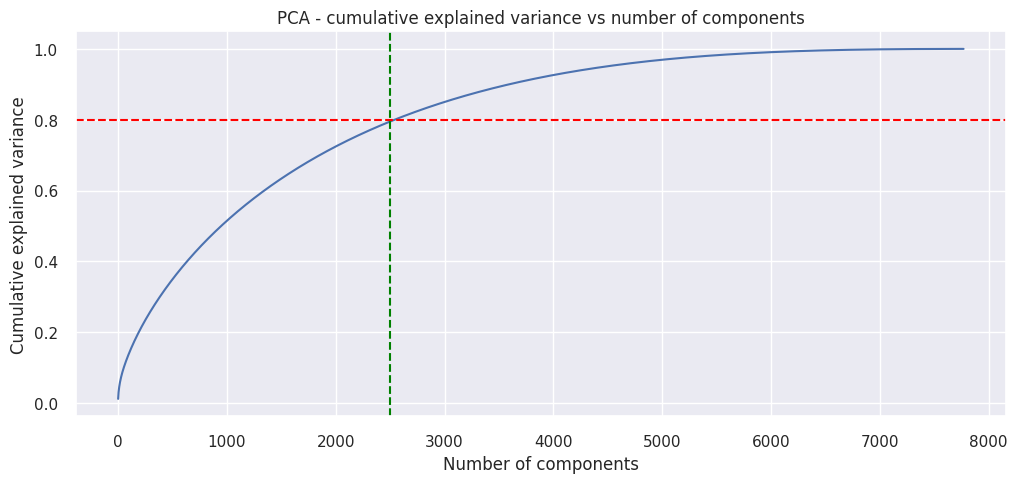

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [ ]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [ ]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 9. Data Splitting
(Not required)

In clustering, train-test splitting is generally unnecessary as it’s an unsupervised learning technique that identifies patterns in the entire dataset without labels. Evaluation uses metrics like silhouette score or inertia. Splitting may apply if clustering is part of a supervised pipeline, where clusters are features for further modeling.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

In clustering, train-test splitting is generally unnecessary as it’s an unsupervised learning technique that identifies patterns in the entire dataset without labels. Evaluation uses metrics like silhouette score or inertia. Splitting may apply if clustering is part of a supervised pipeline, where clusters are features for further modeling.

### 10. Handling Imbalanced Dataset
(Not required)

Handling imbalanced datasets is usually unnecessary in clustering, as it’s unsupervised and doesn’t rely on labels. However, large imbalances can distort results. Mitigation strategies include feature scaling, parameter tuning (e.g., for DBSCAN), or weighted clustering. Addressing imbalances ensures more accurate and meaningful group detection, especially with significant size differences.

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

Handling imbalanced datasets is usually unnecessary in clustering, as it’s unsupervised and doesn’t rely on labels. However, large imbalances can distort results. Mitigation strategies include feature scaling, parameter tuning (e.g., for DBSCAN), or weighted clustering. Addressing imbalances ensures more accurate and meaningful group detection, especially with significant size differences.

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering (For Metric Distortion)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

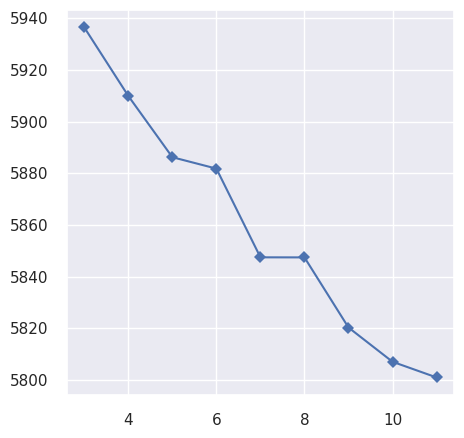

In [ ]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
New_Netflix_df["K_mean_cluster"]=y_kmean
New_Netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  K_mean_cluster  
0  future elite inhabit island paradise far crowd...               0  
1  devastating earthquake hits mexico city trappe...               1  
2  army recruit found dead fellow soldiers forced...               1  
3  postapocalyptic world ragdoll robots hide fear...               5  
4  brilliant group students become cardcounting e...               5

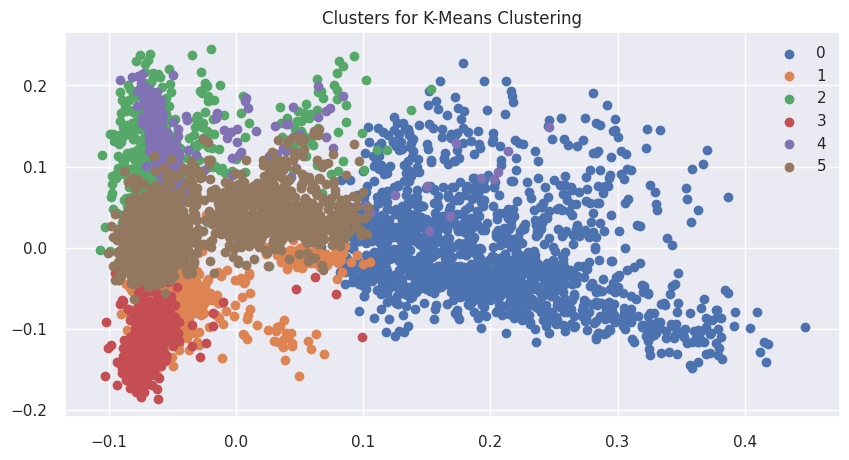

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.


K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

   You could pick K random data points and make those your starting points.

   Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

   Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

  The algorithm is said to have “converged” once there are no more changes.



These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square).   i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

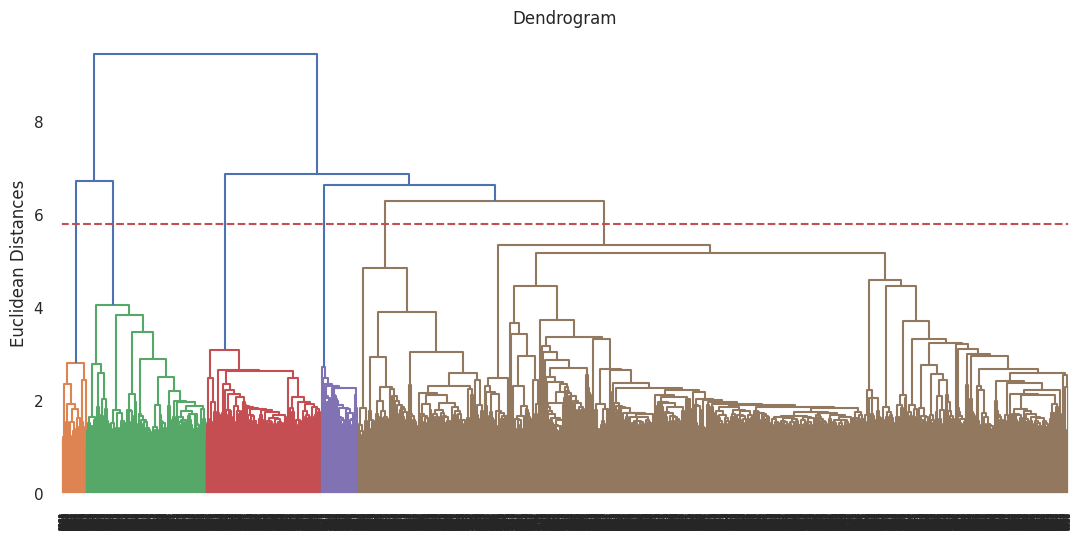

In [ ]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc = aggh.fit_predict(X)


In [ ]:
# Adding a new column 'Agg_cluster' in the dataset
New_Netflix_df["Agg_cluster"]=y_hc
New_Netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  K_mean_cluster  \
0  future elite inhabit island paradise far crowd...               0   
1  devastating earthquake hits mexico city trappe...               1   
2  army recruit found dead fellow soldiers forced...               1   
3  postapocalyptic world ragdoll robots hide fear...               5   
4  brilliant group students become cardcounting e...               5   

   Agg_cluster  
0            1  
1            0  
2            1  
3            0  
4            0

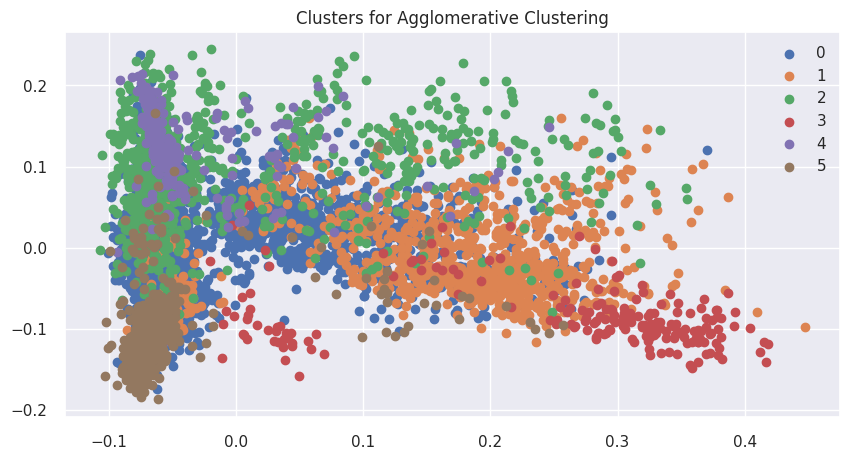

In [ ]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3 : Silhouette Score for Clustering

In [ ]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0083
For n_clusters = 3, silhouette score is 0.0095
For n_clusters = 4, silhouette score is 0.0108
For n_clusters = 5, silhouette score is 0.0072
For n_clusters = 6, silhouette score is 0.0087
For n_clusters = 7, silhouette score is 0.0110
For n_clusters = 8, silhouette score is 0.0065
For n_clusters = 9, silhouette score is 0.0067
For n_clusters = 10, silhouette score is 0.0061
For n_clusters = 11, silhouette score is 0.0074
For n_clusters = 12, silhouette score is 0.0102
For n_clusters = 13, silhouette score is 0.0102
For n_clusters = 14, silhouette score is 0.0109


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

For n_clusters = 2, silhouette score is 0.00832185754194381


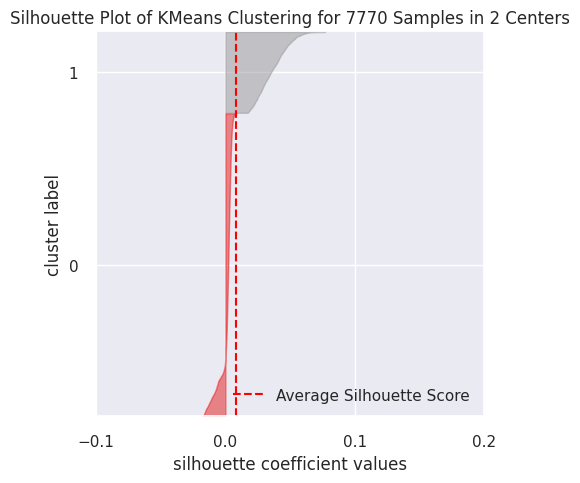

For n_clusters = 3, silhouette score is 0.00954658581454532


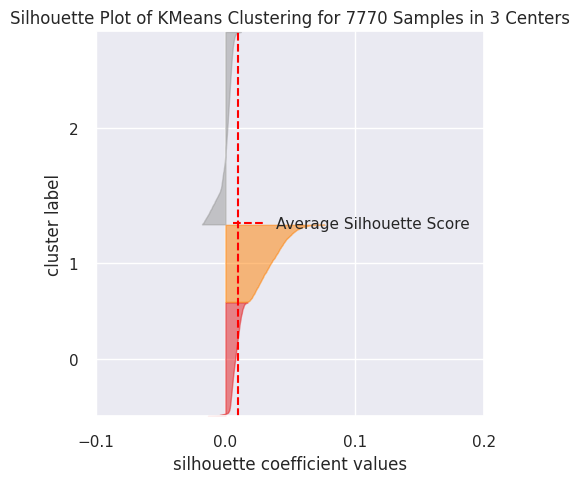

For n_clusters = 4, silhouette score is 0.010786174794204007


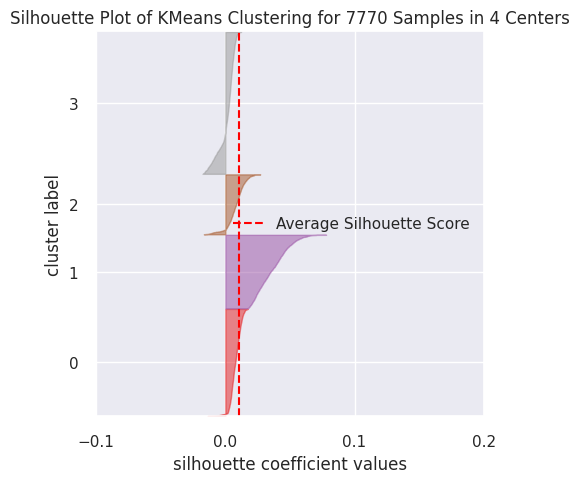

For n_clusters = 5, silhouette score is 0.007170590852332855


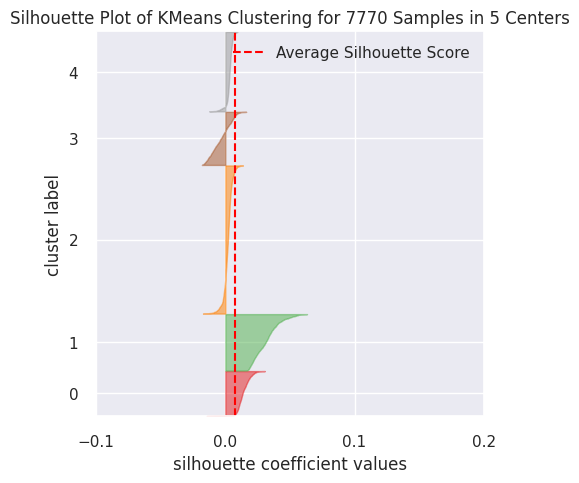

For n_clusters = 6, silhouette score is 0.008673269342041129


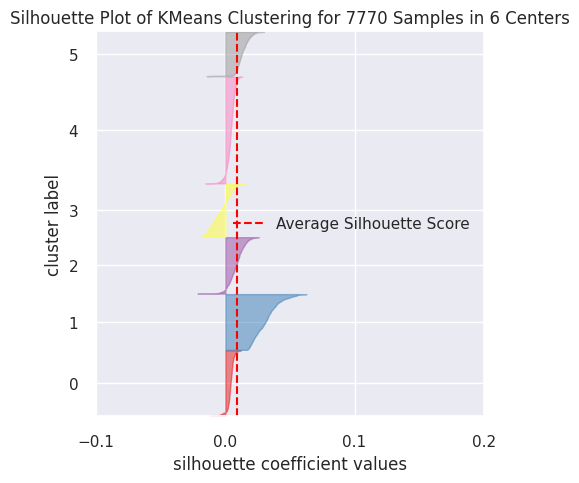

For n_clusters = 7, silhouette score is 0.010980339364370829


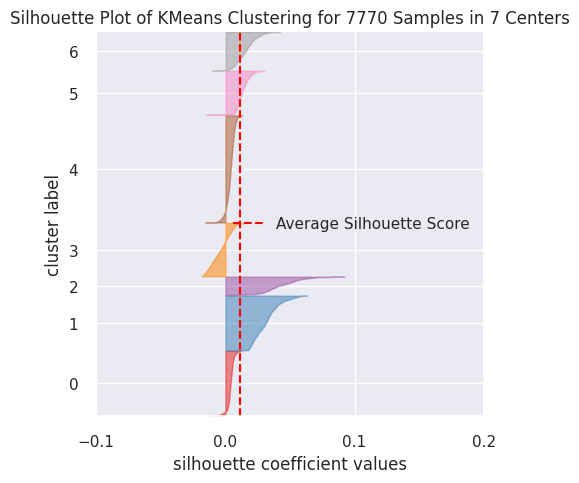

For n_clusters = 8, silhouette score is 0.0065352878091999205


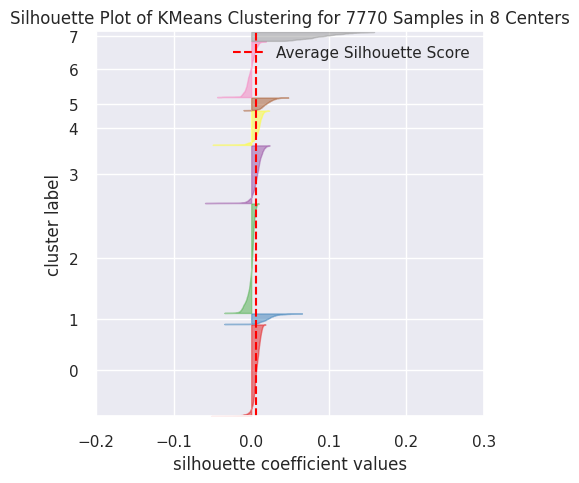

For n_clusters = 9, silhouette score is 0.0067258821046714155


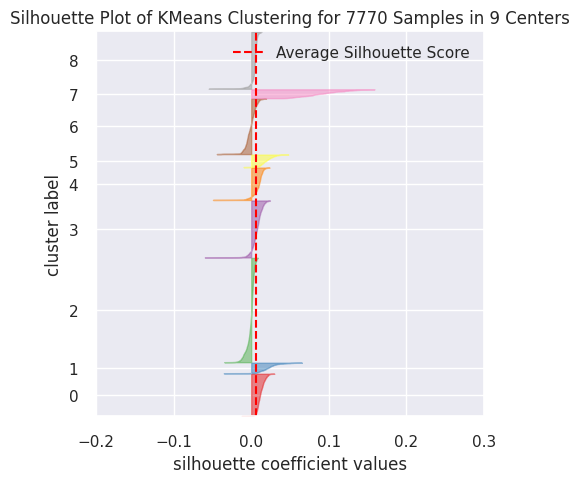

For n_clusters = 10, silhouette score is 0.006129921594403139


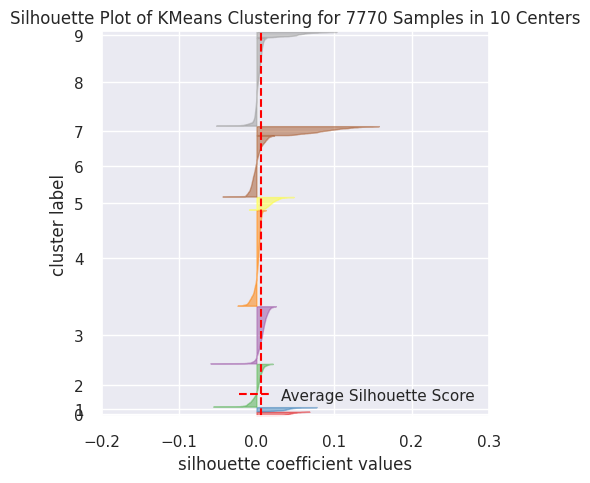

For n_clusters = 11, silhouette score is 0.007393578706981268


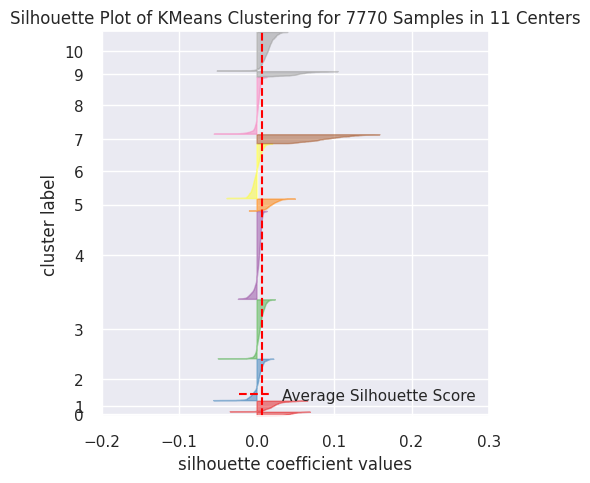

For n_clusters = 12, silhouette score is 0.010209518911823114


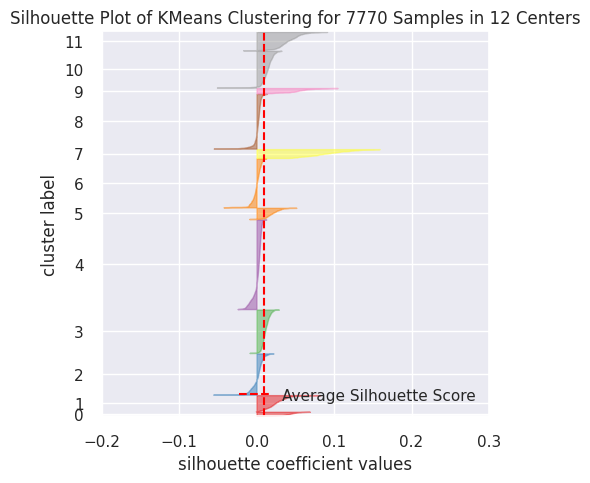

For n_clusters = 13, silhouette score is 0.01016676018885456


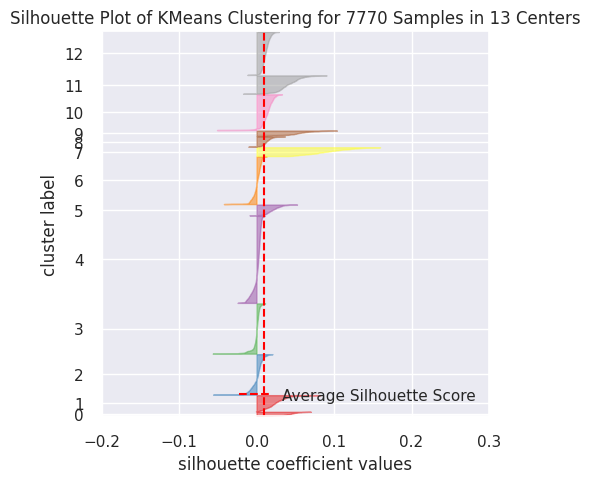

For n_clusters = 14, silhouette score is 0.010896089740764914


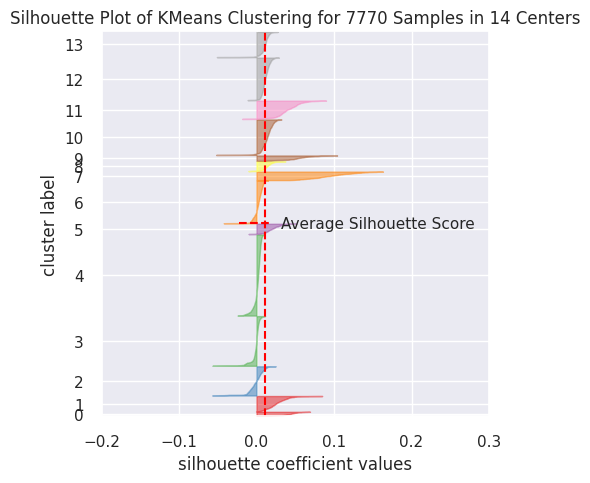

In [ ]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1:** Means clusters are well apart from each other and clearly distinguished.

**0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1:** Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

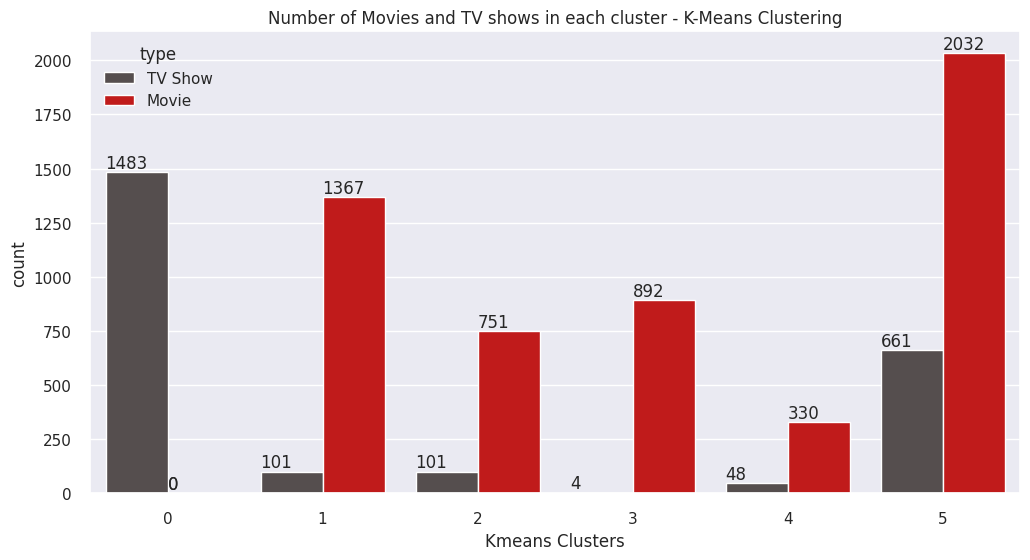

In [ ]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=New_Netflix_df, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................
*  Clustering similar content by matching text-based features

In [ ]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in New_Netflix_df[New_Netflix_df['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

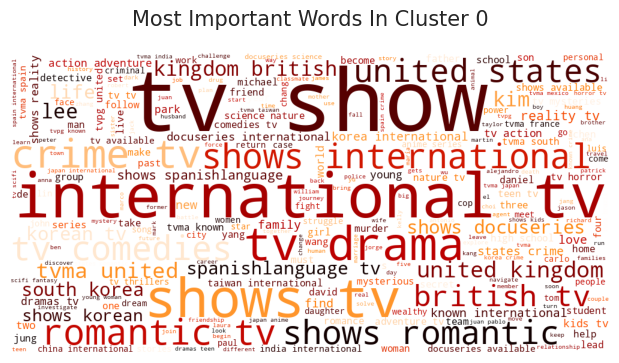

In [ ]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, documentaries, international movies etc.**

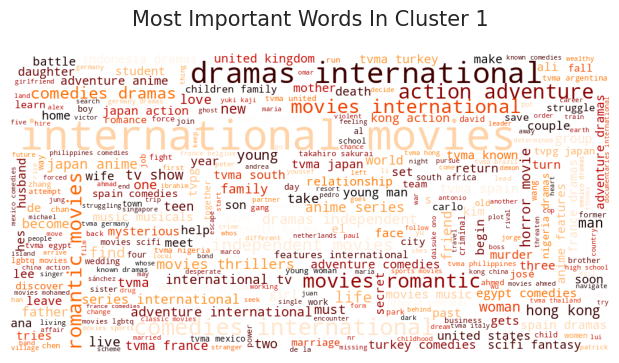

In [ ]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: action adventure, united states, international movies etc.**

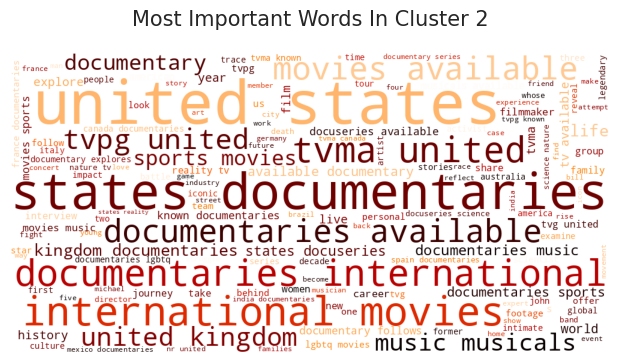

In [ ]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: united states, standup comedy, comedian, tv etc.**

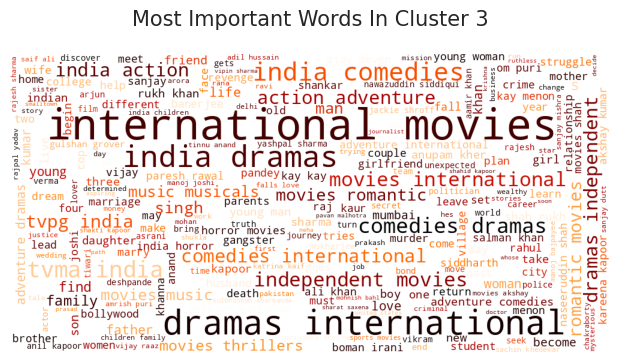

In [ ]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: international tv, tv show, drama, crime tv etc.**

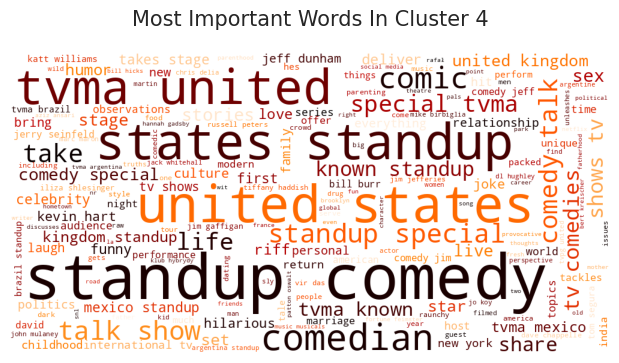

In [ ]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: international movies, drama, comedies, romantic etc.**

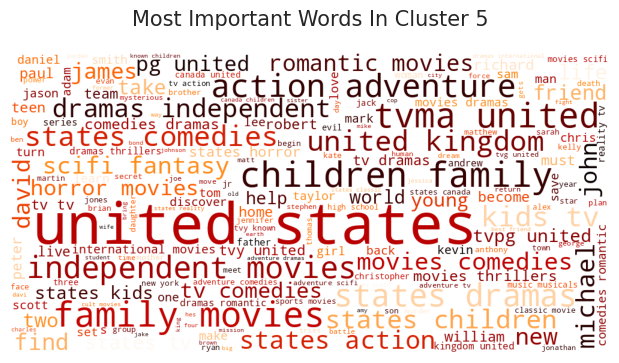

In [ ]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: united states, children, family, dramas, independent movies etc.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Here we have use topic modeling instead of feature importance and model explainability.

Model explainability does majory help in classification problem but here is the project of unsupervised ML.

In topic modeling, we can get topic wise feature importance.

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

In [ ]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(New_Netflix_df['tags'])

In [ ]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.58778048, 0.00357424, 0.00357046, 0.00356943, 0.00357598,
        0.3979294 ],
       [0.00507649, 0.00508775, 0.00507496, 0.00507392, 0.00508518,
        0.97460169],
       [0.34124402, 0.00419857, 0.29682478, 0.0042046 , 0.3493287 ,
        0.00419933],
       ...,
       [0.00729913, 0.96343483, 0.00738982, 0.00730238, 0.00730158,
        0.00727225],
       [0.51246722, 0.00621672, 0.00621642, 0.00619833, 0.46267738,
        0.00622392],
       [0.59294586, 0.37915198, 0.00697196, 0.00697434, 0.00698819,
        0.00696766]])

In [ ]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
united states movies documentaries available 

Topic 1: 
united tv states tvma movies 

Topic 2: 
tv shows international united dramas 

Topic 3: 
movies international india dramas tvma 

Topic 4: 
tv movies united states international 

Topic 5: 
tv movies shows united international 



In [ ]:
# Generate WordCloud Images for Given Topics
# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=""

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()

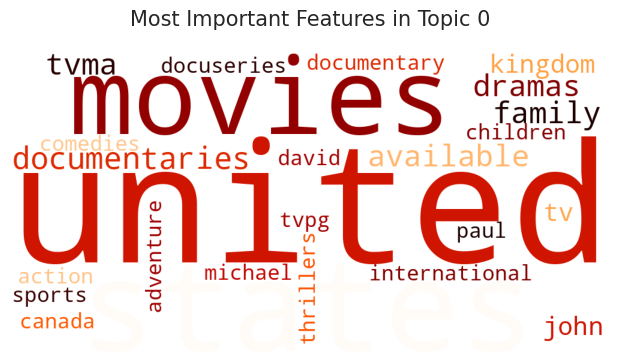

In [ ]:
# WordCloud for Topic 0
draw_word_cloud(0)

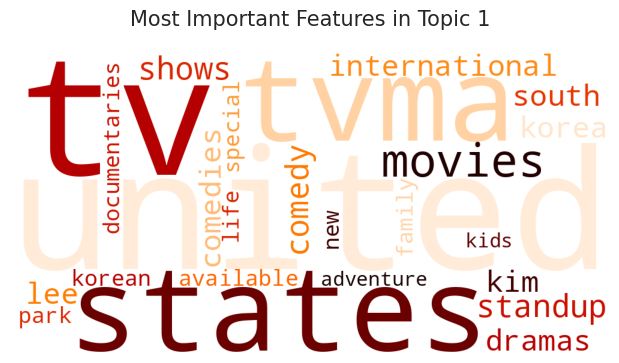

In [ ]:
# WordCloud for Topic 1
draw_word_cloud(1)

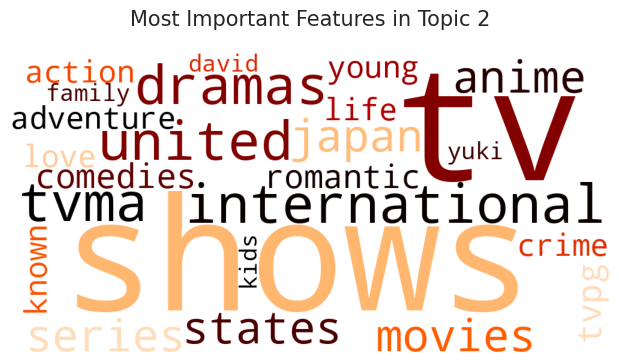

In [ ]:
# WordCloud for Topic 2
draw_word_cloud(2)

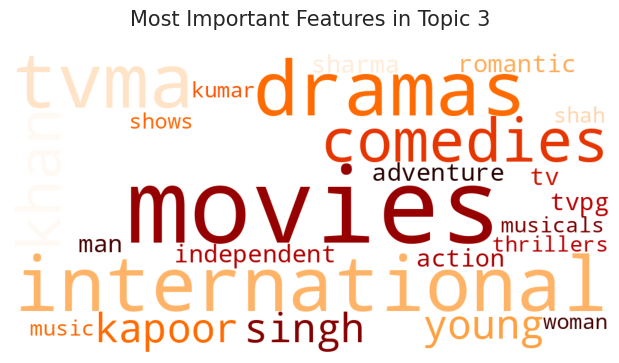

In [ ]:
# WordCloud for Topic 3
draw_word_cloud(3)

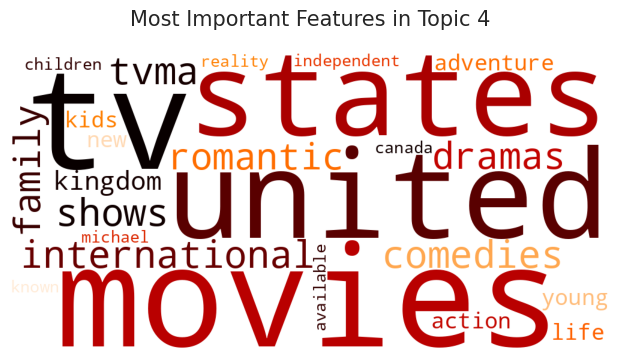

In [ ]:
# WordCloud for Topic 4
draw_word_cloud(4)

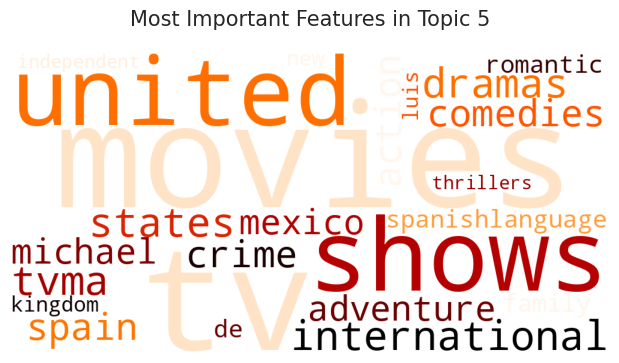

In [ ]:
# WordCloud for Topic 5
draw_word_cloud(5)

Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8. Content Based Recommender System***

In [ ]:
# Defining a new dataframe for building a recommender system
recommender_df = New_Netflix_df.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [ ]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [ ]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(New_Netflix_df.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [ ]:
# Testing Recommender System on a Indian Movie
recommend('Zindagi Na Milegi Dobara')

------------------------------------------------------------
Since you liked 'Zindagi Na Milegi Dobara', you may also like:
------------------------------------------------------------
Dev.D
Zero
Katha
Shanghai
Waiting
Saath Saath
Cycle
Raajneeti
Luck by Chance
Jagga Jasoos


In [ ]:
# Testing Recommender System on a International Movie
recommend('Avengers: Infinity War')

------------------------------------------------------------
Since you liked 'Avengers: Infinity War', you may also like:
------------------------------------------------------------
Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Marco Polo: One Hundred Eyes
Penguins of Madagascar: The Movie
Walk with Me
War Horse
Chef
Legion
Hail, Caesar!


In [ ]:
# Testing Recommender System on a Korean TV Show
recommend('What in the World Happened?')

------------------------------------------------------------
Since you liked 'What in the World Happened?', you may also like:
------------------------------------------------------------
Hymn of Death
Dear My Friends
Hi Bye, Mama!
Secret Affair
Rookie Historian Goo Hae-Ryung
My Mister
Magic Phone
Mr. Sunshine
Man to Man
Love Alarm


In [ ]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend('Avenger')

Didn't find any matches for 'Avenger'. Browse other popular TV shows and movies.


## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('Netflix_kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('Netflix_kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

array([0, 1, 1, ..., 2, 0, 2], dtype=int32)

In [ ]:
y_kmean

array([0, 1, 1, ..., 2, 0, 2], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

* Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

* To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 2500.

* Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

* In Agglomerative clustering the optimal number of clusters was also 6, which we visualized with a dendrogram.

* Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# About me
👋 Hi, I’m Anshuman

👀 I’m interested in Data Science, Data Analysis, Machine Learning, Deep Learning and Artificial intelligence (AI).

🌱 I’m currently learning Data Science - Advanced Certification in Full Stack Data Science and AI (E&ICT) IIT Guwahati.

💞️ I’m looking to collaborate on - Internships or Jobs

🐱 Check out My work at Github- @XAnshumanX
Link https://github.com/XAnshumanX

📫 How to reach me - Linkedin- https://www.linkedin.com/in/anshumanchawhan/

😀 Pronouns: "he/him/his"

